## Project:  Machine Learning

In [736]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix,accuracy_score

### Reading Data-dictionary:


In [737]:
data_dict = pd.read_excel("Election_Data.xlsx",)

In [738]:
data_dict

,**Data Dictionary**
0,1. vote: Party choice: Conservative or Labour
1,2. age: in years
2,3. economic.cond.national: Assessment of curre...
3,4. economic.cond.household: Assessment of curr...
4,"5. Blair: Assessment of the Labour leader, 1 t..."
5,6. Hague: Assessment of the Conservative leade...
6,7. Europe: an 11-point scale that measures res...
7,8. political.knowledge: Knowledge of parties' ...
8,9. gender: female or male.


In [739]:
for i in range(0,9):
    print(data_dict['**Data Dictionary**'][i], sep=':')

1. vote: Party choice: Conservative or Labour
2. age: in years
3. economic.cond.national: Assessment of current national economic conditions, 1 to 5.
4. economic.cond.household: Assessment of current household economic conditions, 1 to 5.
5. Blair: Assessment of the Labour leader, 1 to 5.
6. Hague: Assessment of the Conservative leader, 1 to 5.
7. Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.
8. political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.
9. gender: female or male.


### Reading Data-set:

In [740]:
data = pd.read_excel("Election_Data.xlsx",sheet_name='Election_Dataset_Two Classes')

In [741]:
data.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


## 1. Read the dataset. Do the descriptive statistics and do null value condition check. Write an inference on it. (5 Marks)


### Reading the data set:

In [742]:
data = pd.read_excel("Election_Data.xlsx",sheet_name='Election_Dataset_Two Classes',index_col=0)

In [743]:
data.head(10)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1,Labour,43,3,3,4,1,2,2,female
2,Labour,36,4,4,4,4,5,2,male
3,Labour,35,4,4,5,2,3,2,male
4,Labour,24,4,2,2,1,4,0,female
5,Labour,41,2,2,1,1,6,2,male
6,Labour,47,3,4,4,4,4,2,male
7,Labour,57,2,2,4,4,11,2,male
8,Labour,77,3,4,4,1,1,0,male
9,Labour,39,3,3,4,4,11,0,female
10,Labour,70,3,2,5,1,11,2,male


In [744]:
data.shape

print("There are %d number of rows in data set." % (data.shape[0]))
print("There are %d number of columns in data set." % data.shape[1])

There are 1525 number of rows in data set.
There are 9 number of columns in data set.


#### There are 1525 rows and 9 columns in data set.

In [745]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 119.1+ KB


####  1. There are two columns having object data type and rest of 7 columns as integer type.
####  2. But other than age rest of all columns are categorical/object type in behaviour.
####  3. Therefore prior to descriptive analysis we must change them to correct data type.

In [746]:
# converting to object type for catogorical features 
columns=data.columns[2:8]

for col in columns:
    data[col]=data[col].astype('object')

In [747]:
# rechecking data type once again after conversion
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   object
 3   economic.cond.household  1525 non-null   object
 4   Blair                    1525 non-null   object
 5   Hague                    1525 non-null   object
 6   Europe                   1525 non-null   object
 7   political.knowledge      1525 non-null   object
 8   gender                   1525 non-null   object
dtypes: int64(1), object(8)
memory usage: 119.1+ KB


## Null value condition check:

###  For standard missing values:

In [748]:
data.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

* Therefore there is no standard null value in the data set.

### For non-standard missing values 
#### as well to get unique counts of all Object data type features:

In [749]:
for feature in data.columns: 
    if data[feature].dtype == 'object': 
        print(feature)
        print(data[feature].value_counts())
        print('\n')

vote
Labour          1063
Conservative     462
Name: vote, dtype: int64


economic.cond.national
3    607
4    542
2    257
5     82
1     37
Name: economic.cond.national, dtype: int64


economic.cond.household
3    648
4    440
2    280
5     92
1     65
Name: economic.cond.household, dtype: int64


Blair
4    836
2    438
5    153
1     97
3      1
Name: Blair, dtype: int64


Hague
2    624
4    558
1    233
5     73
3     37
Name: Hague, dtype: int64


Europe
11    338
6     209
3     129
4     127
5     124
8     112
9     111
1     109
10    101
7      86
2      79
Name: Europe, dtype: int64


political.knowledge
2    782
0    455
3    250
1     38
Name: political.knowledge, dtype: int64


gender
female    812
male      713
Name: gender, dtype: int64




* We can see that there is no non-standard null values in any of object-data type features.
* Also from output of data.info we can see that our age column is showing data type of int, therefore there is no non-standard null value in continuous feature as well.

In [750]:
# Let us check whether any of the columns has any value other than numeric i.e. data is not corrupted such as a "?" instead of 
# a number.


data.iloc[:,1:8][~data.iloc[:,1:8].applymap(np.isreal).all(1)]

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge


* Therefore no numerical column has non-standaed null values.

### Descriptive statistics:

In [751]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0


In [752]:
data.describe(include=['object'])

,vote,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
count,1525,1525,1525,1525,1525,1525,1525,1525
unique,2,5,5,5,5,11,4,2
top,Labour,3,3,4,2,11,2,female
freq,1063,607,648,836,624,338,782,812


## Descriptive Summary:

####  FOR CATEGORICAL ATTRIBUTES:


##### 1. vote :
* In category of vote feature there are 2 political parties in the survey.
* Labour party has recieved the highest number of 1063 of votes in the CNBE channel's survey out of total of 1525 votes.

##### 2. economic.cond.national : 
* Five  different ratings has been defined  for assessment of current national economic conditions in the survey for rating purpose.
* * Highest number of 607 of voters out of the 1525 voters have given  Rating 3 for Assessment of current household economic conditions in the survey.


##### 3. economic.cond.household: 
*  Five  different ratings has been defined  for Assessment of current household economic conditions in the survey for rating purpose.
* Highest votes has been given to Rating 3 for Assessment of current household economic conditions, by  648 of voters out of the 1525 voters participated in the survey.  

##### 4. Blair : 
* Five  different ratings has been defined  for Assessment of the Labour party leader, Blair in the survey.
* Highest votes has been given to Rating 4  for Assessment of the Labour party leader, Blair by the 836 of the voters out of 1525 voters participated in the survey . 
* It shows that voters are very satisfied with the Labour leader, Blair.

##### 4. Hague : 
* Five  different ratings has been defined  for Assessment of the Conservative party leader, Hague in the survey for rating purpose by the voters.
* Highest votes has been given to Rating 2  for Assessment of the Conservative party leader, Hague by 624 of the voters out of 1525 voters participated in the survey . 
* It shows that voters not satisfied with the Conservative party leader, Hague. 

##### 5. Europe : 
* There are 11-point scale rating that measures respondents' attitudes toward European integration has been defined to asses the sentiment of the voters towards ‘Eurosceptic’ sentiment . High scores represent higher ‘Eurosceptic’ sentiment. 
* Highest votes has been given to Rating 11  towards ‘Eurosceptic’ sentiment by 338 of the voters out of 1525 voters participated in the survey . 


##### 6. political.knowledge : 
* There are 4 ratings that measures Knowledge of any voter on the parties' positions on European integration  has been defined in the survey.
* Highest votes has been given to Rating 2  for the Knowledge of any voter on the parties' positions on European integration with 782 of the voters out of 1525 voters participated in the survey.

##### 7. gender : 
* There are 2 Gender categories defined in the survey for the voters. 
* Female Gender with 812 voters participated in the survey out of 1525 voters are in more numbers compared to male voters. 


####  FOR NUMERICAL ATTRIBUTES (age):

##### 1. age :
* The range of the age of the voters who participated in the survey ranges from minimum of 24 years to maximum of 93 years.
* 25% of voters are below age of  41 years  where as 25% of the voters are above age of 67 years.
* Average age of the voters is 54.18 years where as median value of age is 53 years.






#### INFERENCE:
* Survey shows that voters are satisfied on the current economical contions of nation as well as on the economical conditions of households.
* Voters are very much satisfied with the Labour Party leader, Blair.
* Voters are not satisfied with the Conservative party leader, Hague.
* Voters has also good knoweledge on the parties' positions on European integration.
* Large numbers of voters have also sentiments towards unification of Europe.
* It means participation of voters accross all ages is almost uniformally distributed i.e. survey has covered all ages of the voters uniformally.


## 2. Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)


# Univariate  Analysis:

### Note:
### Our goal is to show the distribution of different features but as per target class.
### Therefore using " vote" as hue while plotting the distribution plot will show the distribution of features for both classes separately.
### Taking help of dist,count and scatter plot to see the distribution more clearly.

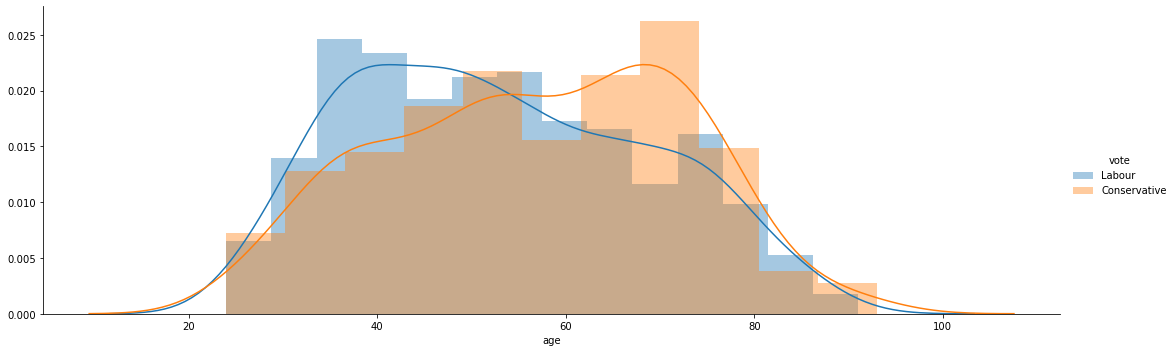

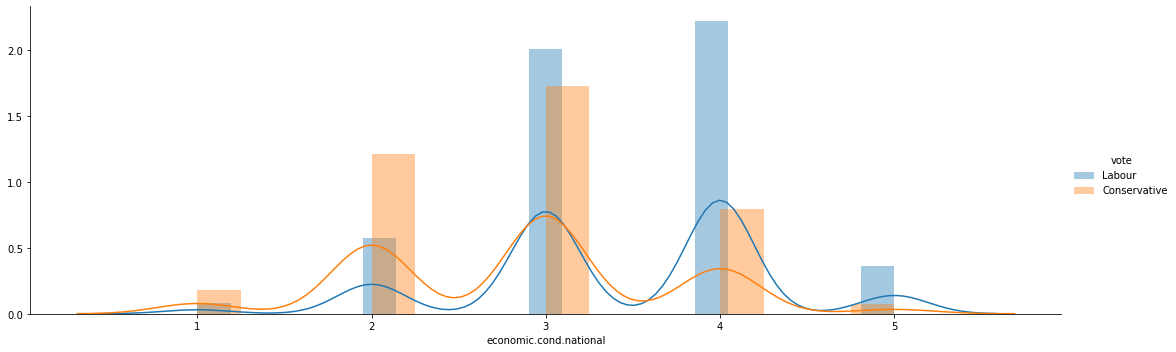

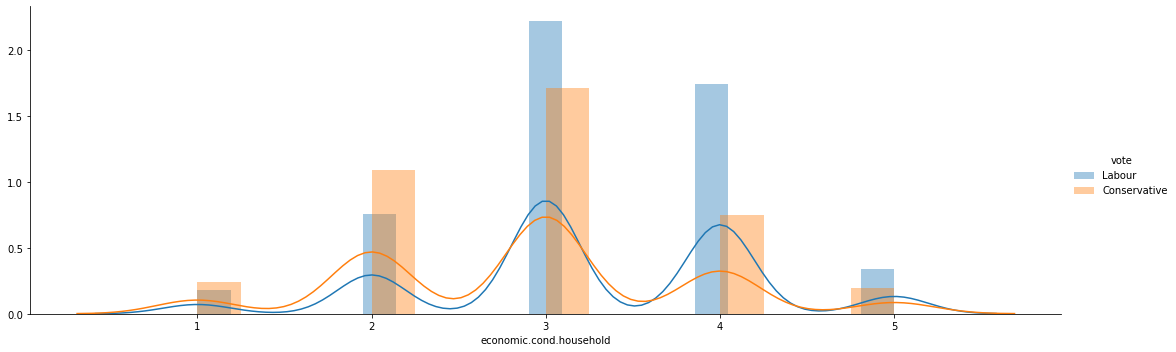

C:\Users\Pankaj\anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


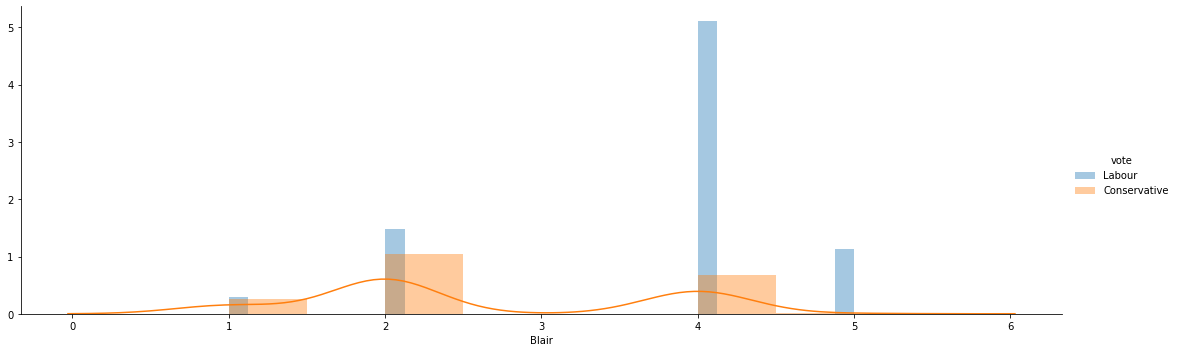

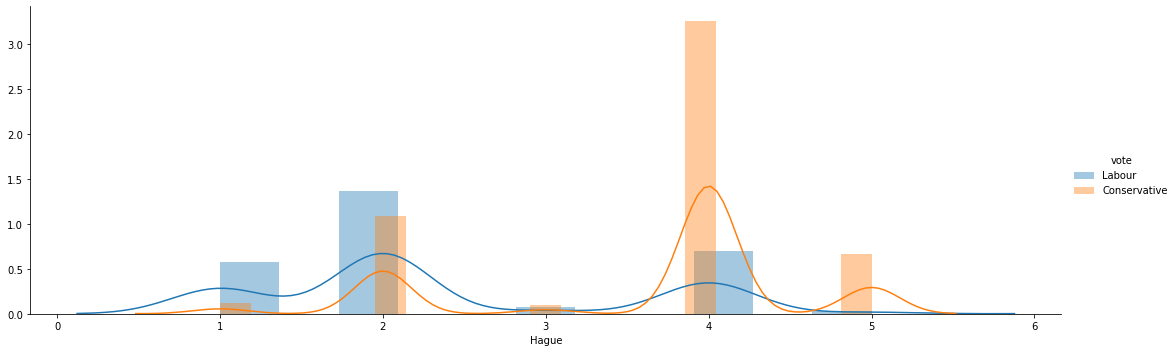

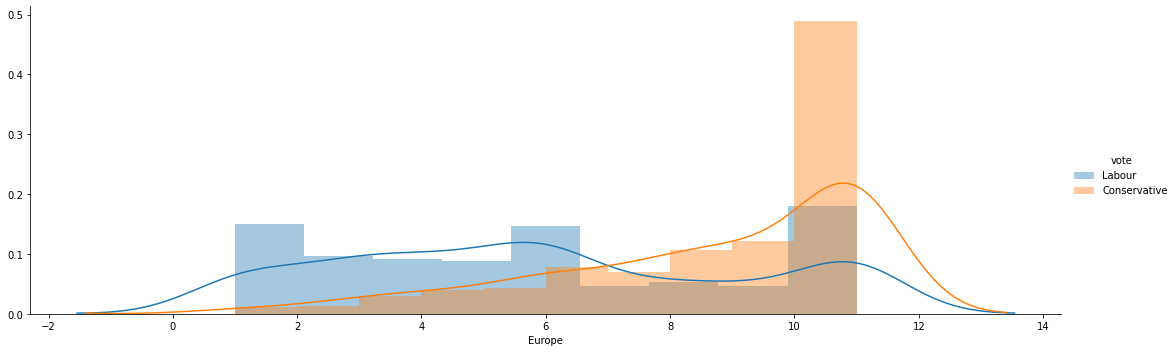

C:\Users\Pankaj\anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


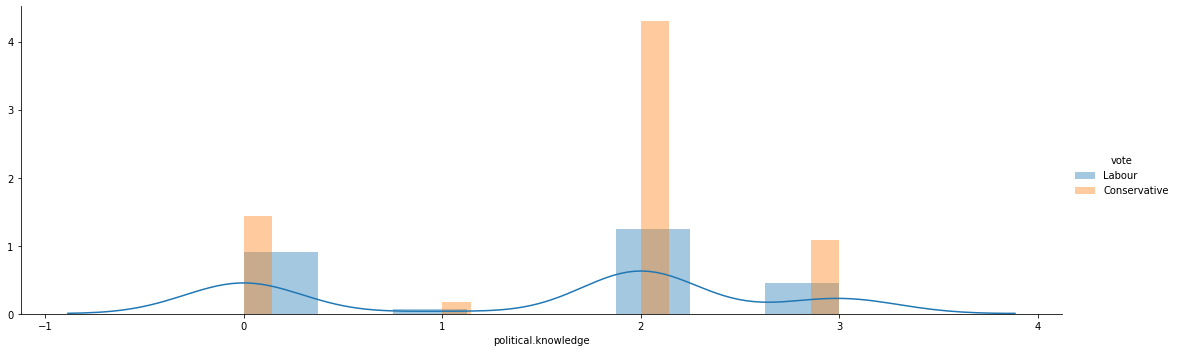

In [753]:
features=data.columns
features=features[1:8]
for col in features:
    sns.FacetGrid(data,hue='vote',height=5,aspect=3,legend_out=True).map(sns.distplot,col).add_legend();
    plt.show();
    

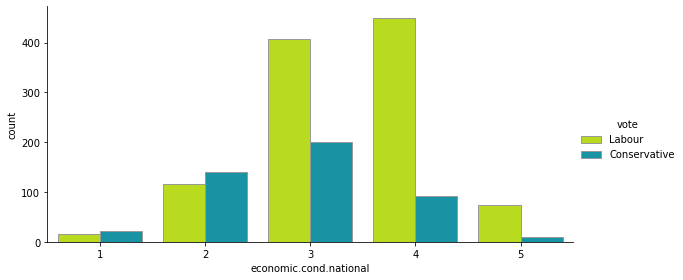

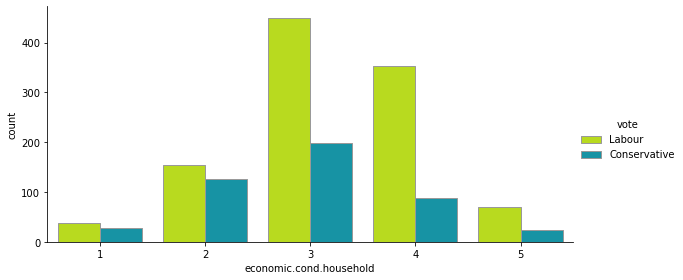

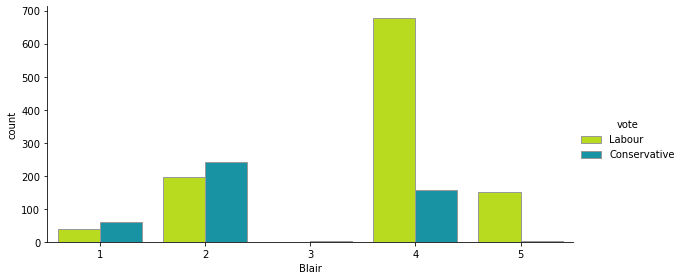

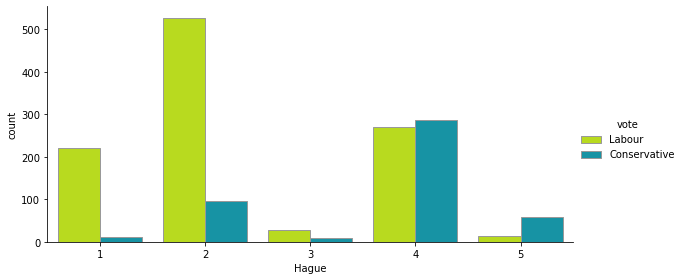

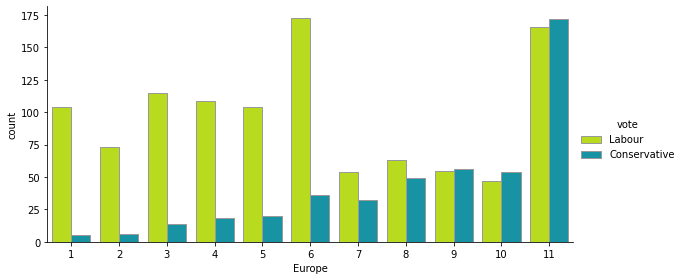

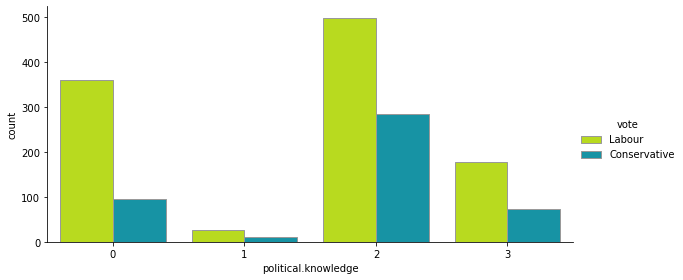

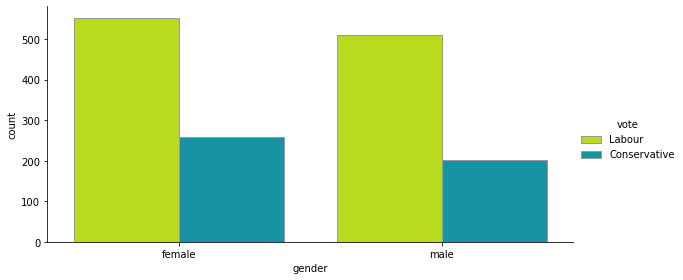

In [754]:
features=data.columns
features=features[2:9]
for col in features:
    
    sns.catplot(x=col, hue="vote", kind="count",palette="nipy_spectral_r", edgecolor=".6",data=data,height=4,aspect=2);


### Scatter plot:

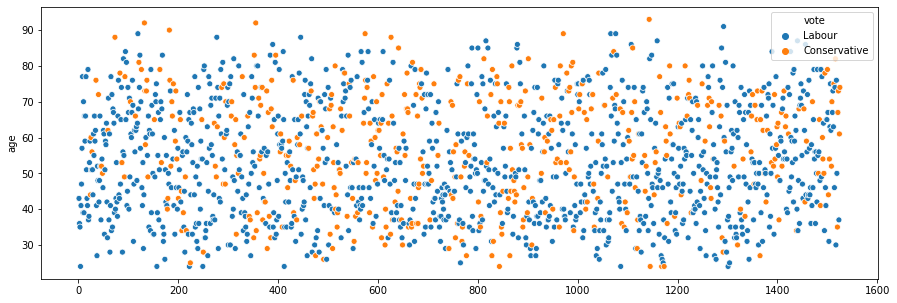

In [755]:
plt.figure(figsize=(15,5))
sns.scatterplot(data.index,y=data['age'],hue=data['vote']);

* From scatter plot age is not able to classify the voting pattern in survey.


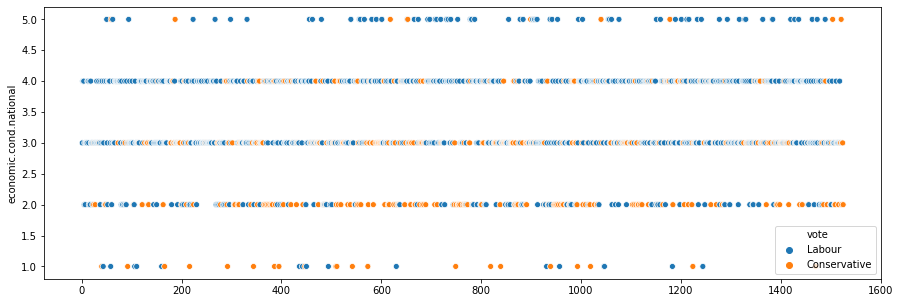

In [756]:
plt.figure(figsize=(15,5))
sns.scatterplot(data.index,y=data['economic.cond.national'],hue=data['vote']);

* From scatter plot we can see that the voters who have rated current economic condition of nation as 3 or above are more inclined for voting to Labour party where as who have rated 2 or below have inclinatation for voting Conservative party.
* Very large number of voters who have rated 3 or 4 for current economic condition of nation has voted for Labour party.
* It means voters rating better for current economic condition of nation are inclined towards Labour party.
* It means voters rating poor for current economic condition of nation are inclined towards Conservative party.

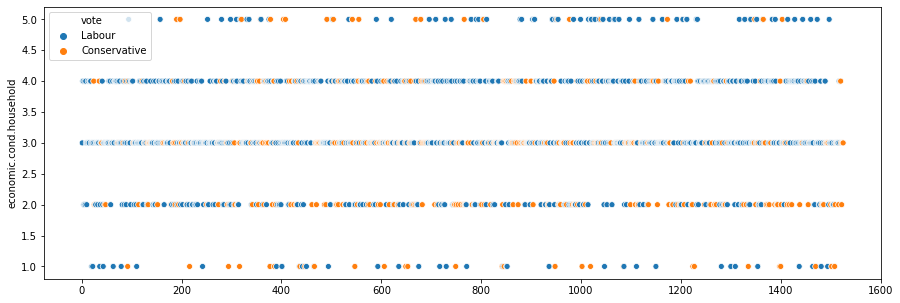

In [757]:
plt.figure(figsize=(15,5))
sns.scatterplot(data.index,y=data['economic.cond.household'],hue=data['vote']);

* From scatter plot we can see that the voters who have rated current economic condition of households as 3 or above are more inclined for voting to Labour party where as who have rated 2 or below have inclinatation for voting Conservative party.
* Very large number of voters who have rated 3 or 4 for current economic condition of households has voted for Labour party.
* It means voters rating better for current economic condition of households are inclined towards Labour party.
* It means voters rating poor for current economic condition of households are inclined towards Conservative party.

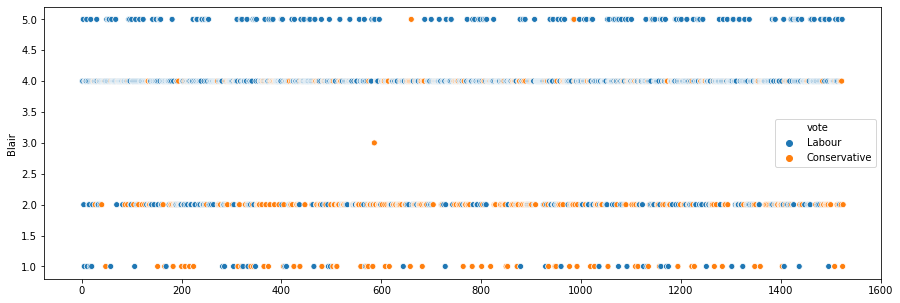

In [758]:
plt.figure(figsize=(15,5))
sns.scatterplot(data.index,y=data['Blair'],hue=data['vote'],);


* Very large number of voters have rated Blair as 4 and 2 but also for the best rating 5.
* Voters rating Blair as 4 or 5 are mostly inclined to vote for Labour Party compared to Conservative party and specially rating 5 have clearly voted for Labour party
* Also voters rating Blair as 1 or 2 have mostly voted for Conservative party in general.
* Ratings by voters for Blair as Leader of Labour Party showing a better classification pattern for voters choice of party in survey and can have idea for voting choice of any voter..

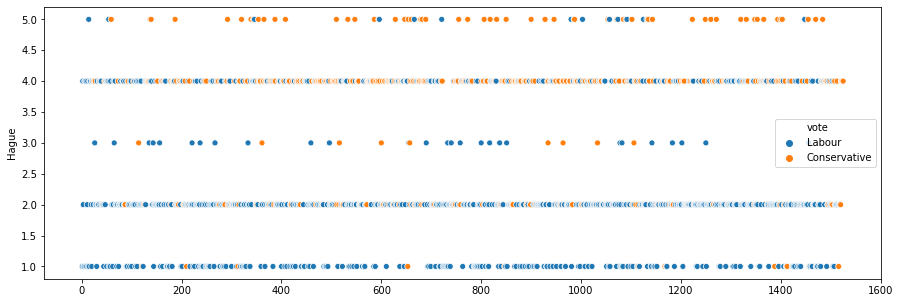

In [759]:
plt.figure(figsize=(15,5))
sns.scatterplot(data.index,y=data['Hague'],hue=data['vote'],);

* Very large number of voters have rated Hague as 4 and 2 but also for the worst rating 0.
* Voters rating Hague as 4 or 5 are mostly inclined to vote for Conservative Party compared to Labour party and specially rating 5 have clearly voted for Conservative party
* Also voters rating Hague as 1 or 2 have mostly voted for Labour party in general.
* Ratings by voters for Hague as Leader of Conservative Party showing a better classification pattern for voters choice of party in survey and can have idea for voting choice of any voter.

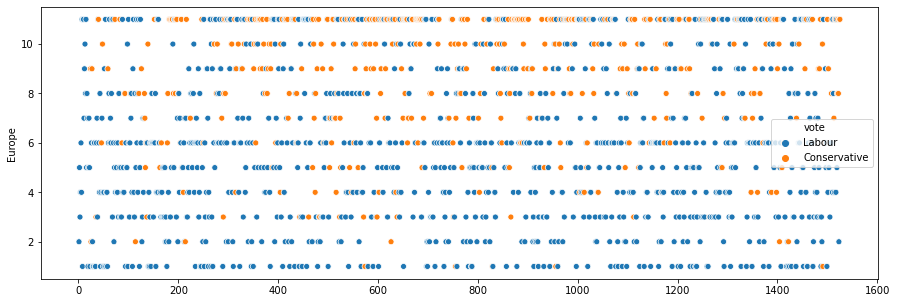

In [760]:
plt.figure(figsize=(15,5))
sns.scatterplot(data.index,y=data['Europe'],hue=data['vote']);

* From scatter plot of Europe, we can have a better ideas about the voting patterns/preference of the voters in survey.
* Voters who have  rated 6 or lesser for attitudes toward European integration are clearly more inclined to vote for Labour Party.
* Simlarly,voters who have  rated 7 or more for attitudes toward European integration i.e. showing ‘Eurosceptic’ sentiment are clearly more inclined to vote for Conservative Party.
* Europe giving better idea to classify the voting pattern of voters in survey and can have idea for voting choice of any voter.

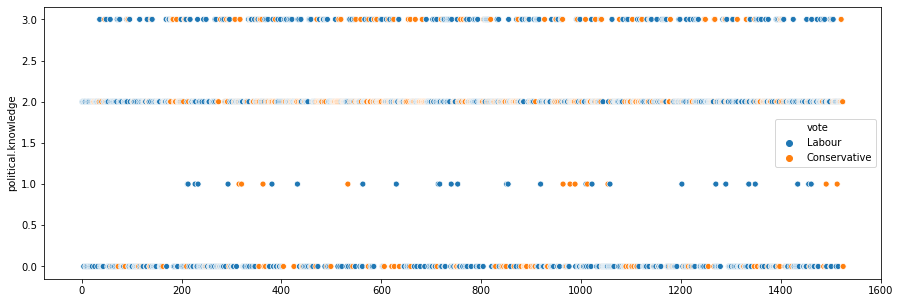

In [761]:
plt.figure(figsize=(15,5))
sns.scatterplot(data.index,y=data['political.knowledge'],hue=data['vote']);

* Highest numers of Voters have rated their Knowledge of parties' positions on European integration as 2 and least numers have rated themselves having 0.
* But this feature is also not able to classify the voting pattern so well.

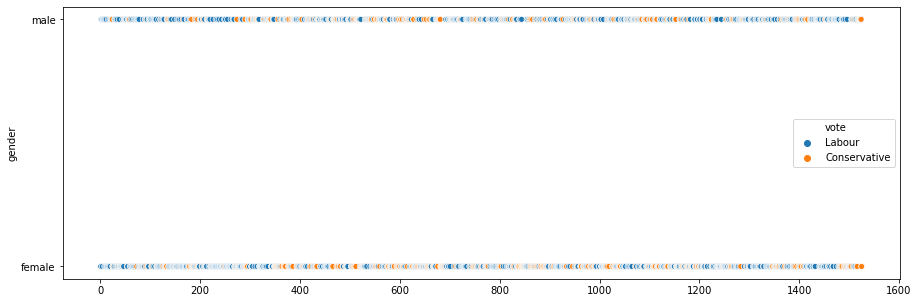

In [762]:
plt.figure(figsize=(15,5))
sns.scatterplot(data.index,y=data['gender'],hue=data['vote']);

* We can see that feature gender is also not able to show any classification for the voting pattern of voters.
* Mix of voter pattern for both the parties in both gender.


## Observatations: classification on basis of different features

### For age :
1. We can see that young voters ranging from age of 25 to 45 have voted for Labour party in large numbers where as voters ranging from age of 65 to 85 has voted Conservative party as their choice.
2. Also the first time voters are in more number for voting conservative party compared to Labour party as their choice and has similar trend for the voters among age of around 90 years aged voters. 

### For economic.cond.national  :
1. We can also observe that maximum of the Voters who have rated current national economic conditions better has voted for Labour party where as maximum of voters who has rated  current national economic conditions as poor has voted for Conservative party.

2. The voters who have rated the current national economic conditions on extreme of the rating scale are able to classify the voting pattern more clearly.

### For economic.cond.household:
1. We can also observe that maximum of the Voters who have rated current household economic conditions better has voted for Labour party where as maximum of voters who has rated  current household economic conditions as poor has voted for Conservative party.
 
### For Blair :
1. Voters who have rated Blair as 4 has voted for Labour party where as the voters who have rated him  5 has clearly voted for Labour party.
2. Also large number of voters has voted for Labour party inspite of their poor rating to Labour party leader, Blair and specially those who have given rating of 2.


### For Hague :
1.	Highest numbers of voters have rated Hague as 4 and 2 but also for the worst rating 0.
2. Voters rating Hague as 4 or 5 are mostly inclined to vote for Conservative Party compared to Labour party and specially rating 5 have clearly voted for Conservative party
3. Also voters rating Hague as 1 or 2 have mostly voted for Labour party in general.
4. Ratings by voters for Hague as Leader of Conservative Party showing a better classification pattern for voters choice of party in survey and can have idea for voting choice of any voter.
 

### For  Europe :
•	From all three types of plots of Europe, we can have a better idea about the voting patterns/preference of the voters in survey.
•	Voters who have rated 6 or lesser for attitudes toward European integration are clearly more inclined to vote for Labour Party.
•	Similarly, voters who have rated 7 or more for attitudes toward European integration i.e. showing ‘Eurosceptic’ sentiment are clearly more inclined to vote for Conservative Party.
•	Europe giving better idea to classify the voting pattern of voters in survey and can have idea for voting choice of any voter.


### For  political.knowledge :
•	Highest numbers of Voters have rated their Knowledge of parties' positions on European integration as 2 and least numbers have rated themselves having 0.
•	But this feature is also not able to classify the voting pattern so well.

### For  Gender :
1. From count plot we can see that both genders has similar trend towards both parties as their choice means both gender has more inclination towards Labour Party.
2. But their voting pattern is not giving any idea that on basis of gender we can classify the voting choice.

# Bivariate Analysis:

C:\Users\Pankaj\anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Pankaj\anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


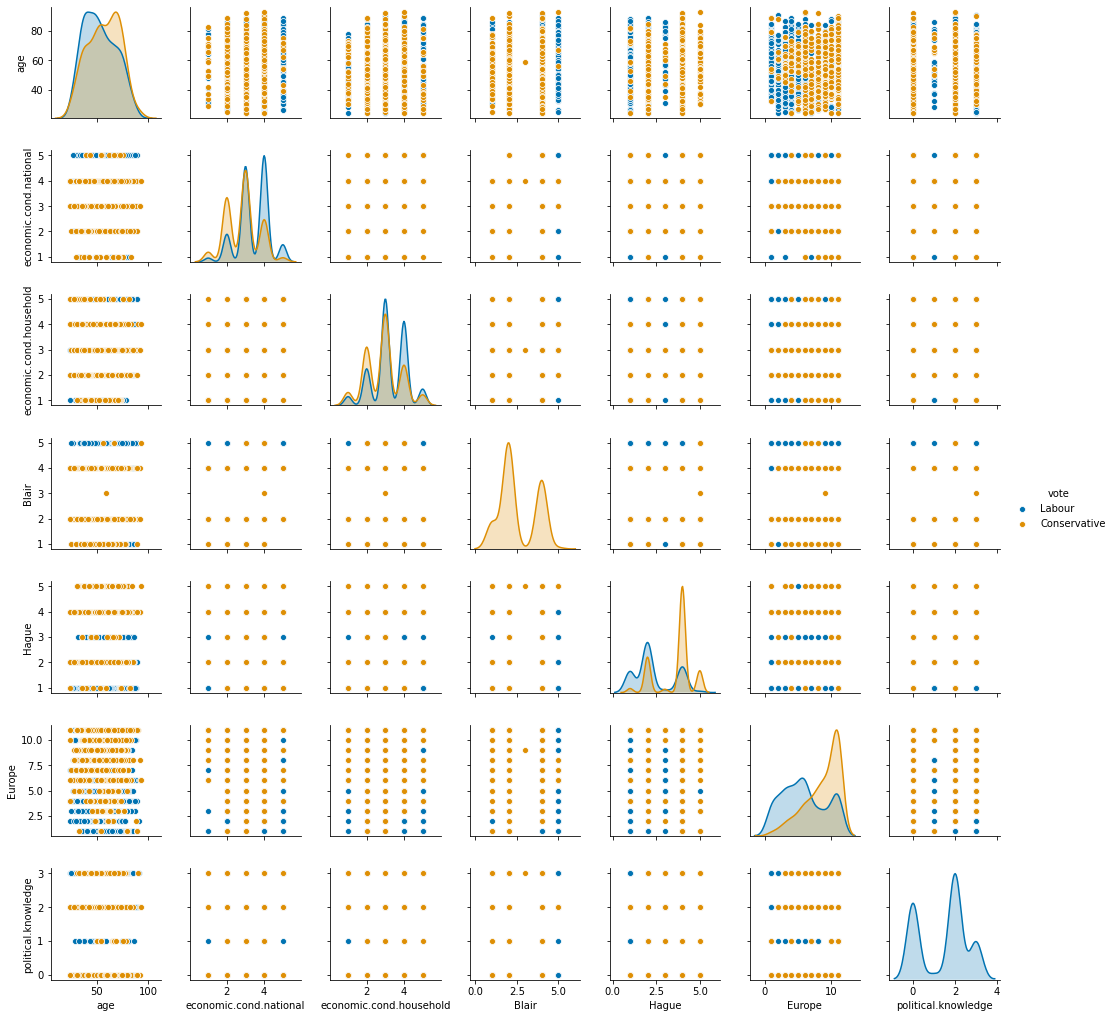

In [763]:
sns.pairplot(data,hue='vote',diag_kind='kde',height=2,aspect=1,palette = 'colorblind');
plt.show();

### OBSERVATIONS:
* From above diagonal distplots of pair plot output, we can say that none of the features is able to classify/separate the classes of the reponse feature perfectly but some these features are giving a better idea of voters choice as party in some range of values clearly.
* In case of age feature we can see that voters of young age has their choice for Labour party where as for voters of older age have Conservative party as their better choice.
* Also the feature Europe is able to classify the voting pattern of voters for party as their choice to vote. 
 

### Bi-Variate Analysis of each feature with Target variable:

####  vote against age:

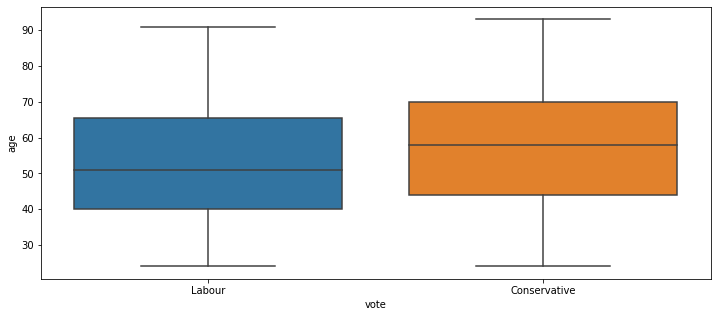

In [764]:
plt.figure(figsize=(12,5))
sns.boxplot(data['vote'],data['age']);

* We can observe that average age of voters for Labour party is less than the average age of the voters who voted for Conservative party.


####  vote against economic.cond.national :

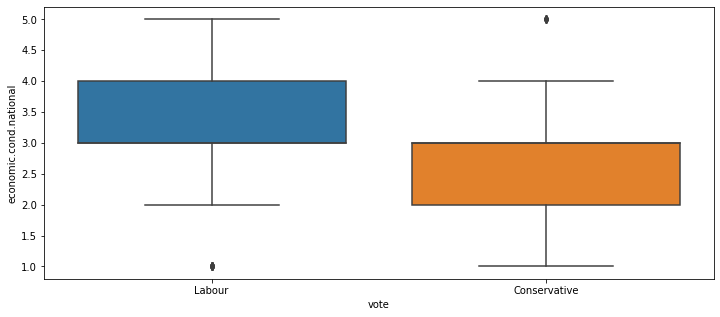

In [765]:
plt.figure(figsize=(12,5))
sns.boxplot(data['vote'],data['economic.cond.national']);

* We can observe that voters who have rated high for current economical condition of nation have voted to Labour party.

### vote against economic.cond.household:

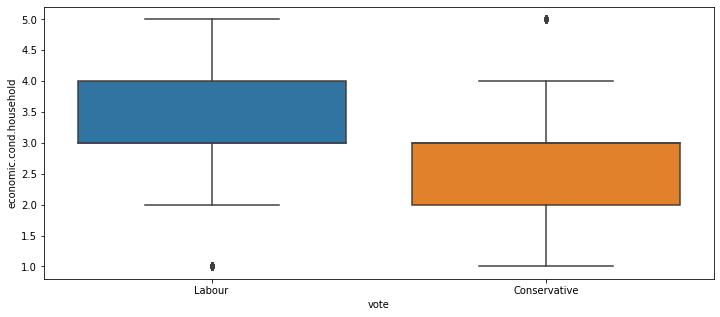

In [766]:
plt.figure(figsize=(12,5))
sns.boxplot(data['vote'],data['economic.cond.household']);

* We can clearly say that voters rating higher for current economic condition of households are showing pattern to vote for Labour party and vice vers.

### vote against Blair :

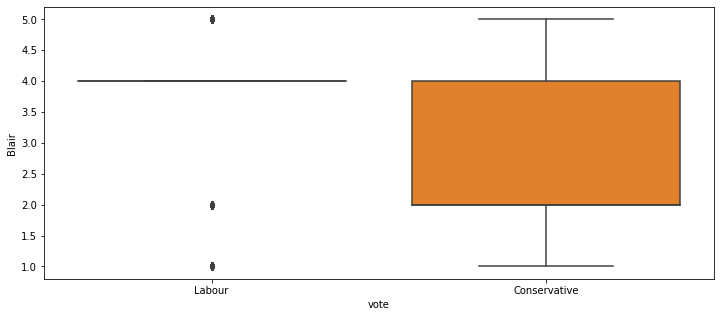

In [767]:
plt.figure(figsize=(12,5))
sns.boxplot(data['vote'],data['Blair']);

### vote against Hague :

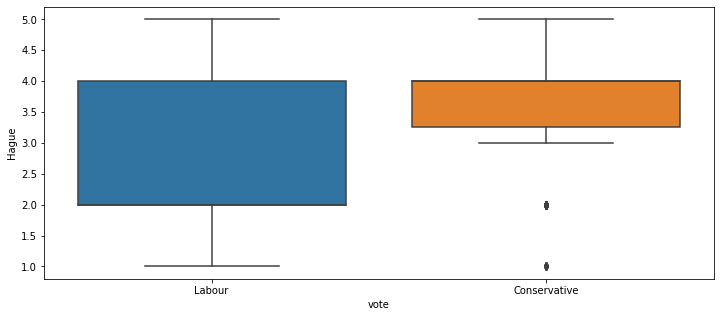

In [768]:
plt.figure(figsize=(12,5))
sns.boxplot(data['vote'],data['Hague']);

### vote against Europe :

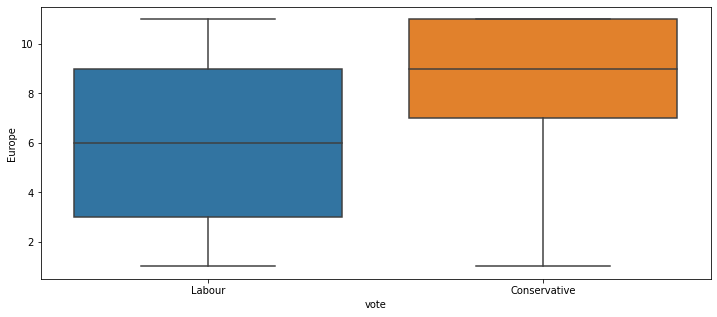

In [769]:
plt.figure(figsize=(12,5))
sns.boxplot(data['vote'],data['Europe']);

### vote against political.knowledge :

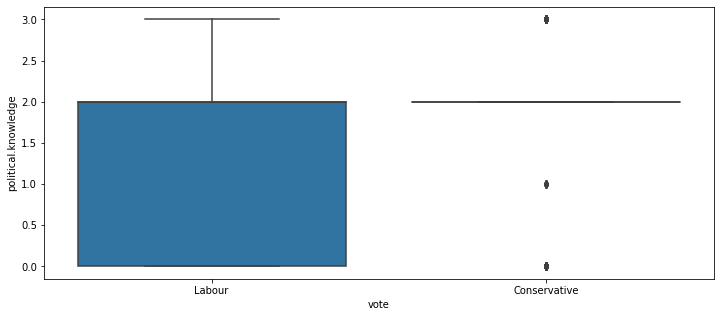

In [770]:
plt.figure(figsize=(12,5))
sns.boxplot(data['vote'],data['political.knowledge']);

In [771]:
# first putting the two feature values in numerical  format
features=[ 'economic.cond.national', 'economic.cond.household', 'Blair',
       'Hague', 'Europe', 'political.knowledge' ]
for col in features:
    data[col]=data[col].astype('int64')


In [404]:
correlation=data.corr()
correlation.round(2)

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male,vote_Labour
age,1.00,0.02,-0.04,0.03,0.03,0.06,-0.05,-0.02,-0.11
economic.cond.national,0.02,1.00,0.35,0.33,-0.20,-0.21,-0.02,0.06,0.30
economic.cond.household,-0.04,0.35,1.00,0.22,-0.10,-0.11,-0.04,0.03,0.17
Blair,0.03,0.33,0.22,1.00,-0.24,-0.30,-0.02,0.07,0.43
Hague,0.03,-0.20,-0.10,-0.24,1.00,0.29,-0.03,-0.03,-0.47
Europe,0.06,-0.21,-0.11,-0.30,0.29,1.00,-0.15,-0.08,-0.38
political.knowledge,-0.05,-0.02,-0.04,-0.02,-0.03,-0.15,1.00,0.16,-0.11
gender_male,-0.02,0.06,0.03,0.07,-0.03,-0.08,0.16,1.00,0.03
vote_Labour,-0.11,0.30,0.17,0.43,-0.47,-0.38,-0.11,0.03,1.00


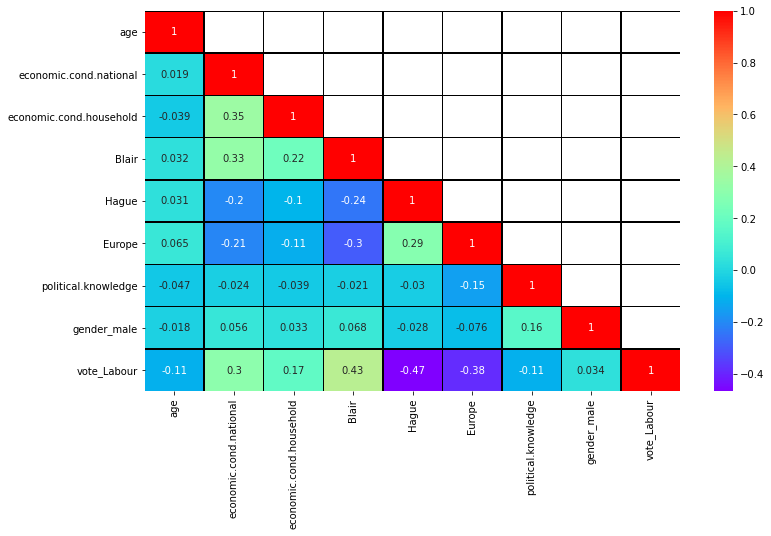

In [405]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(),cmap='rainbow',linecolor='black',linewidths=0.5, annot=True,mask=np.triu(data.corr(),+1));
plt.show();

## Outlier Checks:

* Checking outliers in numerical feature 'age'  only

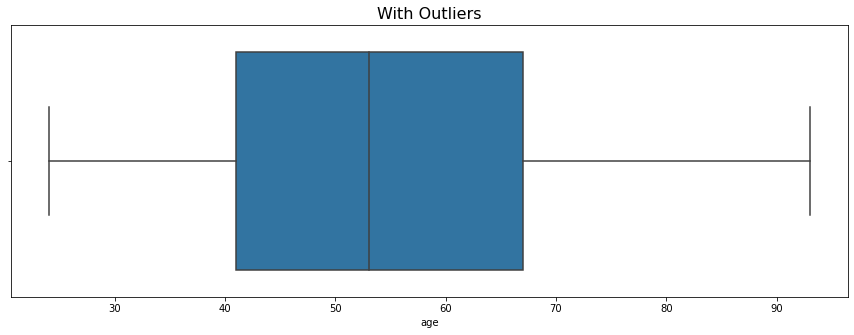

In [297]:
plt.figure(figsize=(15,5))
plt.title('With Outliers',fontsize=16)
sns.boxplot(data['age']);

In [434]:
def get_outliers(col):
    Q3=np.percentile(data[col],75) # value at 75 percentile
    Q1=np.percentile(data[col],25)  # value at 25 percentile
    IQR=Q3-Q1  # range
    Upper_limit=Q3 + 1.5 *(Q3 - Q1)
    Lower_limit=Q1 - 1.5 *(Q3 - Q1)
    outliers=data[(data[col]>Upper_limit) | (data[col]<Lower_limit) ]
    outlier_description= 'outliers in case of attribute ' + col + ' in the  data set .'
    print('There are', len(outliers), outlier_description)
    
    
columns= ['age'] # providing list for variable col. 

for col in columns:
    get_outliers(col)

There are 0 outliers in case of attribute age in the  data set .


#### Therefore there is no outlier in the data set.

###  Checking for  duplicate observations :

In [435]:
data[data.duplicated()==True]

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
68,Labour,35,4,4,5,2,3,2,male
627,Labour,39,3,4,4,2,5,2,male
871,Labour,38,2,4,2,2,4,3,male
984,Conservative,74,4,3,2,4,8,2,female
1155,Conservative,53,3,4,2,2,6,0,female
1237,Labour,36,3,3,2,2,6,2,female
1245,Labour,29,4,4,4,2,2,2,female
1439,Labour,40,4,3,4,2,2,2,male


* There are total of 8 duplicate observations, therefore removing these before modelling.

In [436]:
data.drop_duplicates(inplace=True)

In [437]:
data[data.duplicated()==True]

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender


### Proportion in the Target classes:

In [438]:
(data.vote.value_counts(normalize=True)*100).round(2)

Labour          69.68
Conservative    30.32
Name: vote, dtype: float64

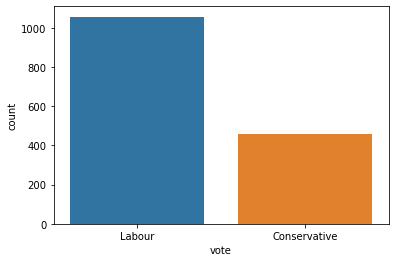

In [439]:
sns.countplot(x='vote',data=data)
plt.show()

### Note: Our target class in data set is  balance.

# Data Preparation:


## 1. Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (5 Marks)


### Encoding the data:
* Method used : Dummy Encoding
* As the two categorical features ‘age’ and ‘vote’ in data set are of nominal data type i.e. the categories do not have an inherent order therefore using Dummy coding scheme to encode these two features.

In [440]:
# Encoding categorical features to numerical values of the two columns

data = pd.get_dummies(data,columns=['gender','vote'],drop_first=True)

In [441]:
data.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male,vote_Labour
1,43,3,3,4,1,2,2,0,1
2,36,4,4,4,4,5,2,1,1
3,35,4,4,5,2,3,2,1,1
4,24,4,2,2,1,4,0,0,1
5,41,2,2,1,1,6,2,1,1


In [442]:
# # first putting the two feature values in right format
features=['gender_male','vote_Labour','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge']
for col in features:
    data[col]=data[col].astype('int64')

In [443]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      1517 non-null   int64
 1   economic.cond.national   1517 non-null   int64
 2   economic.cond.household  1517 non-null   int64
 3   Blair                    1517 non-null   int64
 4   Hague                    1517 non-null   int64
 5   Europe                   1517 non-null   int64
 6   political.knowledge      1517 non-null   int64
 7   gender_male              1517 non-null   int64
 8   vote_Labour              1517 non-null   int64
dtypes: int64(9)
memory usage: 158.5 KB


### Necessity of Scaling data:

* Feature scaling is essential for machine learning algorithms that calculate distances between data. If not scaled the feature with a higher value range will start dominating when calculating distances.
* So algorithms that use distance calculations like K Nearest Neighbor, Regression, SVMs, etc are the ones that require feature scaling.
* On the other hand, algorithms that do not use distance calculations like Naive Bayes, Tree-based models, LDA do not require feature scaling.
* Feature scaling also helps gradient descend to converge more faster on a small range of values.
## Therefore we are using feature scaling in these cases either for distance based algorithms or to help gradient descend to converge more faster on a small range of values.

### Splitting the data into train and test (70:30):

In [444]:
#  all the predictor variables into X dataframe
X = data.drop('vote_Labour',axis=1)

#  all the Target variable into Y dataframe
Y = data.pop('vote_Labour')

In [445]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
1,43,3,3,4,1,2,2,0
2,36,4,4,4,4,5,2,1
3,35,4,4,5,2,3,2,1
4,24,4,2,2,1,4,0,0
5,41,2,2,1,1,6,2,1


In [446]:
pd.DataFrame(Y).head()

,vote_Labour
1,1
2,1
3,1
4,1
5,1


In [447]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [448]:
# independent training data set
X_train.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
530,70,4,3,2,4,10,2,0
142,62,4,3,5,2,1,2,0
1098,54,3,3,4,2,1,2,0
1011,76,4,4,5,2,11,0,0
664,37,4,3,4,4,10,2,1


In [449]:
# dependent training data set
Y.head()

1    1
2    1
3    1
4    1
5    1
Name: vote_Labour, dtype: int64

In [450]:
# Shape of train and test data sets after splitting.
print("Shapes of train and test data sets after splitting the main data set in 70:30 ratio.")
print("Shape of training independent data set is ",X_train.shape)
print("Shape of test independent data set is ",X_test.shape)
print("Shape of training dependent data set is ",Y_train.shape)
print("Shape of test dependent data set is ",Y_test.shape)

Shapes of train and test data sets after splitting the main data set in 70:30 ratio.
Shape of training independent data set is  (1061, 8)
Shape of test independent data set is  (456, 8)
Shape of training dependent data set is  (1061,)
Shape of test dependent data set is  (456,)


In [451]:
# scaled data 
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train,)

X_test= scaler.transform(X_test)


In [452]:
pd.DataFrame(X_train, columns = X.columns).head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,0.983578,0.865299,-0.136285,-1.068878,0.991942,0.967305,0.431865,-0.926360
1,0.474330,0.865299,-0.136285,1.421780,-0.633464,-1.748601,0.431865,-0.926360
2,-0.034918,-0.250232,-0.136285,0.591561,-0.633464,-1.748601,0.431865,-0.926360
3,1.365513,0.865299,0.926939,1.421780,-0.633464,1.269072,-1.404644,-0.926360
4,-1.117069,0.865299,-0.136285,0.591561,0.991942,0.967305,0.431865,1.079493


### Let us see the data comparasion of each feature on same scale after scaling :

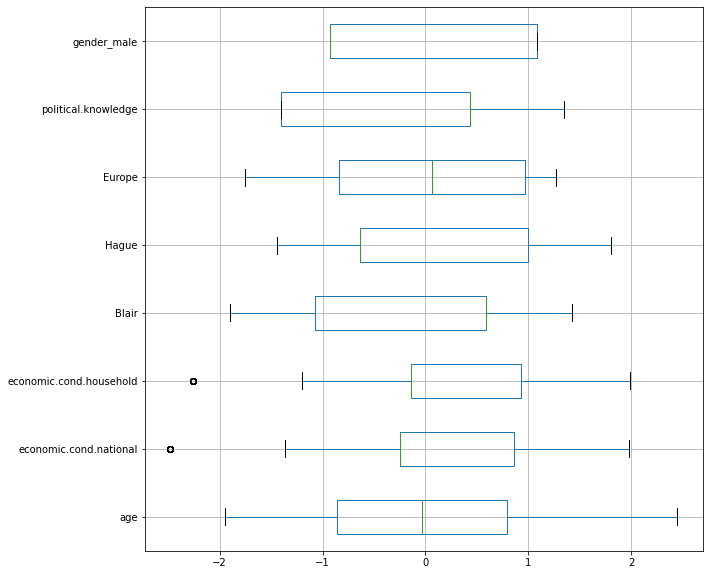

In [453]:
# construct box plot for after scaling variables
plt.figure(figsize=(10,10))
pd.DataFrame(X_train, columns = X.columns).boxplot(vert=0)
plt.show()

## Modelling: 

### Prob. 1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis) (3 pts). Interpret the inferences of both model s (2 pts)    5

##  Logistic Regression 


* Logistic regression does not really have any critical hyperparameters to tune.

* Sometimes, we can see useful differences in performance or convergence with different solvers (solver).

* solver in [‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’]
* Regularization (penalty) can sometimes be helpful.

* penalty in [‘none’, ‘l1’, ‘l2’, ‘elasticnet’]
   Note: not all solvers support all regularization terms.

* The C parameter controls the penality strength, which can also be effective.

* C in [100, 10, 1.0, 0.1, 0.01]

In [478]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(random_state=1,verbose=1 ) 

# training the model using train data set
lgr_model=lgr.fit(X_train,Y_train)
lgr_model

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(random_state=1, verbose=1)

In [479]:
# Accuracy on train data
lgr_model.score(X_train, Y_train)
print("Logistic Regression Model has accuracy of %s on train data set. " % (lgr_model.score(X_train, Y_train)).round(4))

# Accuracy on test data
lgr_model.score(X_test, Y_test)
print("Logistic Regression Model has accuracy of %s on test data set. " % (lgr_model.score(X_test, Y_test)).round(4))

Logistic Regression Model has accuracy of 0.8351 on train data set. 
Logistic Regression Model has accuracy of 0.8333 on test data set. 


### Using GridSearch to finetune the parameters:

In [480]:
param_grid = {        
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
     'tol' : [0.0001,0.01,1e-5],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
      'max_iter': [100,200,10000],
          'C' :[10,1,0.1,0.01] }
                            

lgr = LogisticRegression()

grid_search = GridSearchCV(estimator = lgr, param_grid = param_grid, cv = 10, n_jobs=-1,verbose=True,scoring='accuracy')

In [481]:
grid_search.fit(X_train,Y_train)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 956 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 5756 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed:   33.6s finished
C:\Users\Pankaj\anaconda3\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [10, 1, 0.1, 0.01], 'max_iter': [100, 200, 10000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.0001, 0.01, 1e-05]},
             scoring='accuracy', verbose=True)

In [482]:
best_grid_lgr = grid_search.best_estimator_
best_grid_lgr

LogisticRegression(C=0.1, max_iter=10000, penalty='none', solver='saga',
                   tol=0.01)

In [485]:
# accuracy score for train data
print("Logistic Regression Model with best estimator has mean accuracy of %s on train data set. " % (best_grid_lgr.score(X_train,Y_train)).round(6))
# accuracy score for test data
print("Logistic Regression Model with best estimator has mean has accuracy of %s on test data set. " % (best_grid_lgr.score(X_test,Y_test)).round(4))

Logistic Regression Model with best estimator has mean accuracy of 0.836004 on train data set. 
Logistic Regression Model with best estimator has mean has accuracy of 0.8311 on test data set. 


### INFERENCE: Logistic Regression Model
* Logistic Regression Model is not performing very good but has very negligible variance while predicting test/unseen data therefore we can say that Model is performing on average.
* ALso after tuning the parameters through GridSearchCV we are not finding any improvement hence we will take base model as final model for logistic regression.

##  LDA (linear discriminant analysis) :

In [486]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda= LinearDiscriminantAnalysis()
lda_model=lda.fit(X_train, Y_train)
lda_model

LinearDiscriminantAnalysis()

In [497]:
# Accuracy on train data
lda_model.score(X_train, Y_train)
print("LDA Model has accuracy of %s on train data set. " % (lda_model.score(X_train, Y_train)).round(6))
# Accuracy on test data
lda_model.score(X_test, Y_test)
print("LDA Model has accuracy of %s on test data set. " % (lda_model.score(X_test, Y_test)).round(6))

LDA Model has accuracy of 0.833176 on train data set. 
LDA Model has accuracy of 0.83114 on test data set. 


### Using GridSearch to finetune the parameters:


In [498]:
param_grid = {        
     'tol' : [0.0001,0.001,1e-5],
    'solver' : ['svd', 'lsqr', 'eigen'],
      }
   
lda= LinearDiscriminantAnalysis()

grid_search = GridSearchCV(estimator = lda, param_grid = param_grid, cv = 5, n_jobs=-1,verbose=True,scoring='accuracy')

In [499]:
grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished


GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 0.001, 1e-05]},
             scoring='accuracy', verbose=True)

In [500]:
best_grid_lda = grid_search.best_estimator_
grid_search.best_params_

{'solver': 'svd', 'tol': 0.0001}

In [501]:
# Accuracy on train data
best_grid_lda.score(X_train, Y_train)
print("LDA Model using best estimator has accuracy  of %s on train data set. " % (best_grid_lda.score(X_train, Y_train)).round(6))
# Accuracy on train data
best_grid_lda.score(X_test, Y_test)
print("LDA Model using best estimator has accuracy of %s on test data set. " % (best_grid_lda.score(X_test, Y_test)).round(6))

LDA Model using best estimator has accuracy  of 0.833176 on train data set. 
LDA Model using best estimator has accuracy of 0.83114 on test data set. 


### INFERENCE: LDA Model
* LDA (linear discriminant analysis) Model is not performing very good but has very negligible variance while predicting test/unseen data therefore we can say that Model is performing on average .
* ALso after tuning the parameters through GridSearchCV we are not finding any improvement hence this is optimized model finally.

## Prob. 1.5) Apply KNN Model and Naïve Bayes Model(5 pts). Interpret the inferences of each model (2 pts)


## For KNN Model:

In [502]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=11,)


In [503]:
knn_model=KNN.fit(X_train,Y_train)
knn_model

KNeighborsClassifier(n_neighbors=11)

In [505]:
# accuracy on train data
knn_model.score(X_train,Y_train)
print("KNN Model has accuracy of %s on train data set. " % (knn_model.score(X_train,Y_train)).round(6))

# accuracy on train data
knn_model.score(X_test,Y_test)
print("KNN Model has accuracy of %s on test data set. " % (knn_model.score(X_test,Y_test)).round(6))

KNN Model has accuracy of 0.852026 on train data set. 
KNN Model has accuracy of 0.842105 on test data set. 


### Using GridSearch to finetune the parameters:

In [506]:
param_grid = {        
     'n_neighbors' : [5,7,9,11,19],
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size' : [10,15,20,30,40],
      }
   
KNN = KNeighborsClassifier()

grid_search = GridSearchCV(estimator = KNN, param_grid = param_grid, cv = 10, n_jobs=-1,verbose=True,scoring='accuracy')

In [507]:
grid_search.fit(X_train,Y_train)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 230 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 1430 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   19.0s finished


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 15, 20, 30, 40],
                         'n_neighbors': [5, 7, 9, 11, 19],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=True)

In [509]:
best_grid_knn = grid_search.best_estimator_
best_grid_knn

KNeighborsClassifier(leaf_size=10, n_neighbors=7)

In [510]:
# Accuracy on train data
best_grid_knn.score(X_train, Y_train)
print("KNN Model with best estimator has accuracy of %s on train data set. " % (best_grid_knn.score(X_train, Y_train)).round(4))

# accuracy on test data
best_grid_knn.score(X_test,Y_test)
print("KNN Model with best estimator has accuracy of %s on test data set. " % (best_grid_knn.score(X_test,Y_test)).round(4))

KNN Model with best estimator has accuracy of 0.8549 on train data set. 
KNN Model with best estimator has accuracy of 0.8246 on test data set. 


### INFERENCE: KNN Model
* KNN  base Model with parametern_neighbours =11,  is performing on average and also has very and very small variance while predicting test/unseen data.
* This model is  also performing better than above other models if we compare from accuracy point of view.
* Also after tuning the parameters through GridSearchCV we are not finding any improvement but worsens hence base model trained with parameter value n_neighbors=11 this is optimized model finally.

## For Naïve Bayes Model:

In [511]:
from sklearn.naive_bayes import GaussianNB
NBC = GaussianNB()

nbc_model = NBC.fit(X_train, Y_train)


In [512]:
nbc_model = NBC.fit(X_train, Y_train)
nbc_model

GaussianNB()

In [519]:
# accuracy on train data
nbc_model.score(X_train,Y_train)
print("Naïve Bayes Model has accuracy of %s on train data set. " % (nbc_model.score(X_train,Y_train)).round(4))

# accuracy on test data
nbc_model.score(X_test,Y_test)
print("Naïve Bayes Model has accuracy of %s on test data set. " % (nbc_model.score(X_test,Y_test)).round(4))

Naïve Bayes Model has accuracy of 0.8294 on train data set. 
Naïve Bayes Model has accuracy of 0.8443 on test data set. 


### Using GridSearch to finetune the parameters:

In [520]:
param_grid = {'var_smoothing' : [1e-03,1e-05,1e-07,1e-09,1e-11]}   
 
NBC = GaussianNB()

grid_search = GridSearchCV(estimator = NBC, param_grid = param_grid, cv = 10, n_jobs=-1,verbose=True,scoring='accuracy')

In [521]:
grid_search.fit(X_train,Y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [0.001, 1e-05, 1e-07, 1e-09, 1e-11]},
             scoring='accuracy', verbose=True)

In [522]:
best_grid_nbc = grid_search.best_estimator_
best_grid_nbc

GaussianNB(var_smoothing=0.001)

In [523]:
# accuracy on train data
best_grid_nbc.score(X_train,Y_train)

print("Naïve Bayes Model using best estimator has accuracy of %s on train data set. " % (best_grid_nbc.score(X_train,Y_train)).round(4))

# accuracy on test data
best_grid_nbc.score(X_test,Y_test)
print("Naïve Bayes using best estimator has accuracy of %s on test data set. " % (best_grid_nbc.score(X_test,Y_test)).round(4))

Naïve Bayes Model using best estimator has accuracy of 0.8294 on train data set. 
Naïve Bayes using best estimator has accuracy of 0.8443 on test data set. 


### INFERENCE: Naïve Bayes Model
* Naïve Bayes Model is performing  good upto some extent as it has very and very small variance while predicting test/unseen data and also performing better than other models if we compare from accuracy point of view on train and test data sets.therefore we can say that Model is performing on average.
* Also after tuning the parameters through GridSearchCV we are not finding any improvement but worsens hence base model trained  is optimized model finally.

## Prob. 1.6)  Model Tuning (2 pts) , Bagging ( 2.5 pts) and Boosting (2.5 pts).7

* Model Tuning, Bagging (Random Forest should be applied for Bagging) and Boosting. (7 marks)


## Bagging:
* Types of bagging Algorithms
* There are mainly two types of bagging techniques.

* Bagging meta-estimator

* Random Forest

####  Bagging Meta- Estimator:
* It is meta- estimator which can be utilized for predictions in classification and regression problems by means of   BaggingClassifier and BaggingRegressor, which are available in scikit learning library. This method involves the following steps:

* The original data set is used to create some random subsets which is nothing but bagging or Bootstrapping.

* All features are included in the subsets of the data set.

* A suitable base estimator is fitted on each of the small sets.

* The final result will be a combination of predictions from each mode.

### Random Forest:
* It is the most popular technique in the bagging methods category. It is used for classification as well as regression problems. Random forest is nothing but a combination of decisions to identify and locate the data point, inappropriate class. It selects a set of features, only those can decide best split at each node of the decision tree. It works as follows:

* Like a bagging meta- estimator, some random subsets are generated from the original dataset.

* Only a random set of features are considered to decide the best split, at each node in the decision tree.

* Each subset is fitted on the decision tree model.

* The final prediction is nothing but the average of the predictions from all decision trees.

* Thus, both techniques work to decrease variance and to improve the overall performance of the prediction model rather than a single model.

### Note:

#### Bagging methods work best with strong and complex models (e.g., fully developed decision trees), 
#### In contrast with boosting methods which usually work best with weak models (e.g., shallow decision trees) and specially stumps having brancheh at depth of 1 to 3 .

### Decision Tree:


In [657]:
from sklearn import tree
DT_model= tree.DecisionTreeClassifier(max_depth=7,random_state=0)


In [658]:
DT_model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=7, random_state=0)

In [659]:
## Performance Matrix on train data set
Y_train_predict = DT_model.predict(X_train)
model_score = DT_model.score(X_train, Y_train)
# Accuracy on train data
DT_model.score(X_train, Y_train)
print("DT Model has accuracy of %s on train data set. " % (DT_model.score(X_train, Y_train)).round(4))
# accuracy on test data
DT_model.score(X_test,Y_test)
print("DT Model has accuracy of %s on test data set. " % (DT_model.score(X_test,Y_test)).round(4))

DT Model has accuracy of 0.902 on train data set. 
DT Model has accuracy of 0.7961 on test data set. 


#### Inference :
####                     We can see that Decision Tree is showing very high variance while predicting for unseen data.
####                     We can use Ensamble technique to reduce the variance.

### Using Rnadom Forest (Bagging)  :

In [559]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators=700,max_depth=7,random_state=42)


In [562]:
Bagging_RFCL= rfcl.fit(X_train,Y_train)
Bagging_RFCL

RandomForestClassifier(max_depth=7, n_estimators=700, random_state=42)

In [563]:
# Accuracy on train data
Bagging_RFCL.score(X_train, Y_train)
print("Random Forest Model has accuracy of %s on train data set. " % (Bagging_RFCL.score(X_train, Y_train)).round(4))
# accuracy on test data
Bagging_RFCL.score(X_test,Y_test)
print("Random Forest Model has accuracy of %s on test data set. " % (Bagging_RFCL.score(X_test,Y_test)).round(4))

Random Forest Model has accuracy of 0.9048 on train data set. 
Random Forest Model has accuracy of 0.8333 on test data set. 


## Model Tuning :  Using GridSearch

In [564]:
param_grid = {        
     'n_estimators' : [int(x) for x in np.linspace(start = 200, stop =600, num =5)],
    'max_depth' : [7,8,9],
    'min_samples_split' : [2,4],
    'min_samples_leaf' : [2,3],
    "max_features"   : [2,3],
    
      }
   
rfcl = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(estimator = rfcl , param_grid = param_grid, cv = 3, n_jobs=-1,verbose=True,scoring='accuracy')

In [565]:
grid_search.fit(X_train,Y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  5.5min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [7, 8, 9], 'max_features': [2, 3],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 4],
                         'n_estimators': [200, 300, 400, 500, 600]},
             scoring='accuracy', verbose=True)

In [566]:
best_grid_RFCL = grid_search.best_estimator_
best_grid_RFCL

RandomForestClassifier(max_depth=7, max_features=2, min_samples_leaf=2,
                       n_estimators=400, random_state=0)

In [567]:
# Accuracy on train data
best_grid_RFCL.score(X_train, Y_train)
print("Random Forest Model using best estimator has accuracy of %s on train data set. " % (best_grid_RFCL.score(X_train, Y_train)).round(4))
# accuracy on test data
best_grid_RFCL.score(X_test,Y_test)
print("Random Forest Model using best estimator has accuracy of %s on test data set. " % (best_grid_RFCL.score(X_test,Y_test)).round(4))

Random Forest Model using best estimator has accuracy of 0.8935 on train data set. 
Random Forest Model using best estimator has accuracy of 0.8311 on test data set. 


### INFERENCE : Bagging  (Random Forest)


### We can see that we have reduced the variance in model while predicting on unseen data by using Random Forest as a Bagging Technique.
### In our base model DT had variance of more than 10% where as in Bagging technique this has gone down to less than 7%.

##  Boosting technique (adaboost):


####  using simple Decision Trees  (DT with 2 depth level) as base estimator

In [568]:
from sklearn.ensemble import AdaBoostClassifier

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=2)

adb = AdaBoostClassifier(base_estimator= dtc, n_estimators=10000,random_state=42,learning_rate=0.001)


In [569]:
Boosting_adb=adb.fit(X_train,Y_train)
Boosting_adb

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.001, n_estimators=10000, random_state=42)

In [570]:
# Accuracy on train data
Boosting_adb.score(X_train,Y_train)
print("Adaboost Model has accuracy of %s on train data set. " % (Boosting_adb.score(X_train,Y_train)).round(4))
# accuracy on test data
Boosting_adb.score(X_test,Y_test)
print("Adaboost Model has accuracy of %s on test data set. " % (Boosting_adb.score(X_test,Y_test)).round(4))

Adaboost Model has accuracy of 0.8643 on train data set. 
Adaboost Model has accuracy of 0.8509 on test data set. 


 ## Model Tuning :  Using GridSearch

In [571]:
from sklearn.model_selection import GridSearchCV
#Creating a grid of hyperparameters
grid_params = {'n_estimators' : [int(x) for x in np.linspace(start = 100, stop = 1000, num =20)],
               'learning_rate':[1.0,0.1,0.001,0.0001]}
#Building a 3 fold CV GridSearchCV object
ada_boost=AdaBoostClassifier()
grid_search = GridSearchCV(estimator = ada_boost, param_grid = grid_params, scoring = 'accuracy', cv = 3, n_jobs = -1)
#Fitting the grid to the training data 
grid_search.fit(X_train, Y_train)


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [1.0, 0.1, 0.001, 0.0001],
                         'n_estimators': [100, 147, 194, 242, 289, 336, 384,
                                          431, 478, 526, 573, 621, 668, 715,
                                          763, 810, 857, 905, 952, 1000]},
             scoring='accuracy')

In [580]:
#Extracting the best parameters
grid_search.best_params_

{'learning_rate': 0.1, 'n_estimators': 336}

In [581]:
best_grid_Adbc = grid_search.best_estimator_
best_grid_Adbc

AdaBoostClassifier(learning_rate=0.1, n_estimators=336)

In [582]:
# Accuracy on train data
best_grid_Adbc.score(X_train,Y_train)
print("Adaboost Model using best estimator has accuracy of %s on train data set. " % (best_grid_Adbc.score(X_train,Y_train)).round(4))
# accuracy on test data
best_grid_Adbc.score(X_test,Y_test)
print("Adaboost Model using best estimator has accuracy of %s on test data set. " % (best_grid_Adbc.score(X_test,Y_test)).round(4))

Adaboost Model using best estimator has accuracy of 0.8426 on train data set. 
Adaboost Model using best estimator has accuracy of 0.8311 on test data set. 


### GradientBoosting

In [575]:
from sklearn.ensemble import GradientBoostingClassifier

In [576]:
gbc = GradientBoostingClassifier(max_depth=2,n_estimators=10000,random_state=42,learning_rate=0.001)
gbc_model=gbc.fit(X_train, Y_train)

In [577]:
# Accuracy on train data
gbc_model.score(X_train, Y_train)
print("Adaboost Model using best estimator has accuracy of %s on train data set. " % (gbc_model.score(X_train,Y_train)).round(4))
# accuracy on test data
gbc_model.score(X_test,Y_test)
print("Adaboost Model using best estimator has accuracy of %s on test data set. " % (gbc_model.score(X_test,Y_test)).round(4))

Adaboost Model using best estimator has accuracy of 0.8596 on train data set. 
Adaboost Model using best estimator has accuracy of 0.8509 on test data set. 


## Note: 
### AdaBoosting and  GradientBoosting has almost similar performence therefore we can use one of them. 


## Prob. 1.7). Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized. (7 marks)


### Checking the performance of Predictions on Train and Test sets for all models:

### For Logistic Regression Model:

In [660]:
# predicting train and test labels 
predictlgr_train_Y = lgr_model.predict(X_train)
predictlgr_test_Y = lgr_model.predict(X_test)

# predicting train and test labels probabilities
probs_lgr_train = lgr_model.predict_proba(X_train)
probs_lgr_test = lgr_model.predict_proba(X_test)

### Performence :Accuracy 

In [661]:
# Logistic Regression Model accuracy on train data

lgr_train_acc = accuracy_score(Y_train,predictlgr_train_Y).round(2)
print("Logistic Regression model accuracy on  train data : ",accuracy_score(Y_train,predictlgr_train_Y).round(2))
# Logistic Regression Model accuracy on test data

lgr_test_acc=accuracy_score(Y_test,predictlgr_test_Y).round(2)
print("Logistic Regression model accuracy on  test  data : ",accuracy_score(Y_test,predictlgr_test_Y).round(2))


Logistic Regression model accuracy on  train data :  0.84
Logistic Regression model accuracy on  test  data :  0.83


### Confusion Matrix:

In [662]:
# Confusion Matrix For train data
pd.DataFrame(confusion_matrix(Y_train,predictlgr_train_Y))

,0,1
0,231,104
1,71,655


In [663]:
# Confusion Matrix For test data
pd.DataFrame(confusion_matrix(Y_test,predictlgr_test_Y))

,0,1
0,75,50
1,26,305


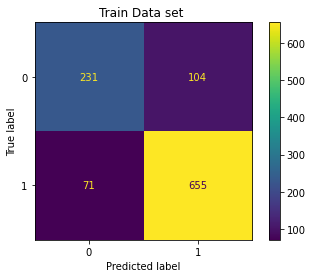

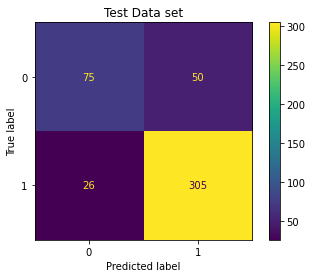

In [664]:
plot_confusion_matrix(lgr_model,X_train,Y_train);
plt.title('Train Data set ');

plot_confusion_matrix(lgr_model,X_test,Y_test);
plt.title('Test Data set');

### Classification report:

In [665]:
# classification report For train data

print(classification_report(Y_train,predictlgr_train_Y))

              precision    recall  f1-score   support

           0       0.76      0.69      0.73       335
           1       0.86      0.90      0.88       726

    accuracy                           0.84      1061
   macro avg       0.81      0.80      0.80      1061
weighted avg       0.83      0.84      0.83      1061



In [666]:
# # classification report For test data
print(classification_report(Y_test,predictlgr_test_Y))

              precision    recall  f1-score   support

           0       0.74      0.60      0.66       125
           1       0.86      0.92      0.89       331

    accuracy                           0.83       456
   macro avg       0.80      0.76      0.78       456
weighted avg       0.83      0.83      0.83       456



### Plotting ROC curve and getting ROC_AUC score for Logistic Regression model:

AUC of logistic regression model on train data: 0.887
AUC of logistic regression model on test data: 0.892


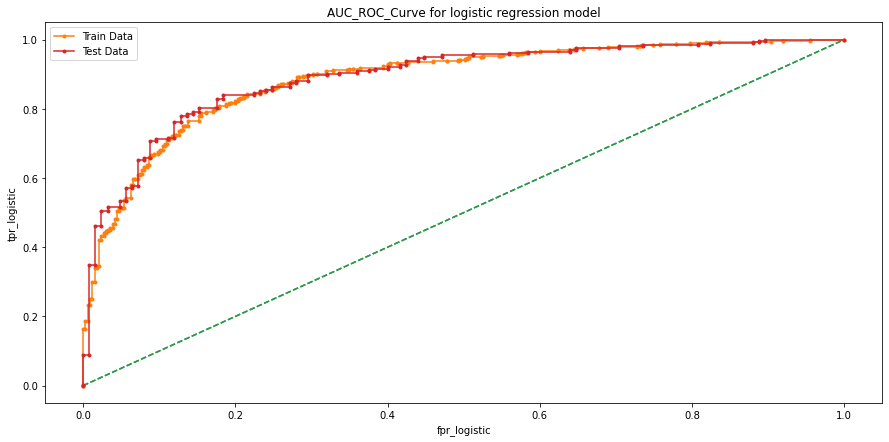

In [667]:
# for train data

# predict probabilities
probs_lgr_train = lgr_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_lgr_train = probs_lgr_train[:, 1]
# calculate AUC
lgr_train_auc = roc_auc_score(Y_train, probs_lgr_train)
print('AUC of logistic regression model on train data: %.3f' % lgr_train_auc)
# calculate roc curve
lgr_train_fpr, lgr_train_tpr, lgr_train_thresholds = roc_curve(Y_train, probs_lgr_train)
plt.figure(figsize=(15,7))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lgr_train_fpr, lgr_train_tpr, marker='.',label='Train Data');


# for test data

# predict probabilities
probs_lgr_test = lgr_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_lgr_test = probs_lgr_test[:, 1]
# calculate AUC
lgr_test_auc = roc_auc_score(Y_test, probs_lgr_test)
print('AUC of logistic regression model on test data: %.3f' % lgr_test_auc)
# calculate roc curve
lgr_test_fpr, lgr_test_tpr, lgr_test_thresholds = roc_curve(Y_test,probs_lgr_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lgr_test_fpr, lgr_test_tpr, marker='.',label='Test Data');
plt.xlabel('fpr_logistic');
plt.ylabel('tpr_logistic');
plt.title(('AUC_ROC_Curve for logistic regression model'))
plt.legend(loc='best')
plt.show()

#### INFERENCE:

### Performence Summary for Logistic Regression Model:

In [668]:
# For train data set

Logistic_metrics=classification_report(Y_train,predictlgr_train_Y,output_dict=True)
df_dt=pd.DataFrame(Logistic_metrics).transpose()
Logistic_train_f1=round(df_dt.loc["1"][2],2)
Logistic_train_recall=round(df_dt.loc["1"][1],2)
Logistic_train_precision=round(df_dt.loc["1"][0],2)
print ('Logistic_train_precision ',Logistic_train_precision)
print ('Logistic_train_recall ',Logistic_train_recall)
print ('Logistic_train_f1 ',Logistic_train_f1)

Logistic_train_precision  0.86
Logistic_train_recall  0.9
Logistic_train_f1  0.88


In [669]:
# For test  data set
Logistic_metrics=classification_report(Y_test,predictlgr_test_Y,output_dict=True)
df_dt=pd.DataFrame(Logistic_metrics).transpose()
Logistic_test_f1=round(df_dt.loc["1"][2],2)
Logistic_test_recall=round(df_dt.loc["1"][1],2)
Logistic_test_precision=round(df_dt.loc["1"][0],2)
print ('Logistic_test_precision ',Logistic_test_precision)
print ('Logistic_test_recall ',Logistic_test_recall)
print ('Logistic_test_f1 ',Logistic_test_f1)

Logistic_test_precision  0.86
Logistic_test_recall  0.92
Logistic_test_f1  0.89


### Inference:

### Performance of LDA (linear discriminant analysis) Model:

In [670]:
# predicting train and test labels 

predictlda_train_Y = lda_model.predict(X_train)
predictlda_test_Y = lda_model.predict(X_test)


# predicting train and test labels probabilities
probs_lda_train = lda_model.predict_proba(X_train)
probs_lda_test = lda_model.predict_proba(X_test)

### Performence : Accuracy 

In [671]:
# LDA Model accuracy on train data

LDA_train_acc = accuracy_score(Y_train,predictlda_train_Y).round(2)
print("LDA model accuracy on train data : ",accuracy_score(Y_train,predictlda_train_Y).round(4))

# LDA Model accuracy on test data

LDA_test_acc = accuracy_score(Y_test,predictlda_test_Y).round(2) 
print("LDA model accuracy on test  data : ",accuracy_score(Y_test,predictlda_test_Y).round(4))

LDA model accuracy on train data :  0.8332
LDA model accuracy on test  data :  0.8311


### Confusion Matrix:

In [672]:
# for train data
pd.DataFrame(confusion_matrix(Y_train,predictlda_train_Y))

,0,1
0,236,99
1,78,648


In [673]:
# for test data
pd.DataFrame(confusion_matrix(Y_test,predictlda_test_Y))

,0,1
0,78,47
1,30,301


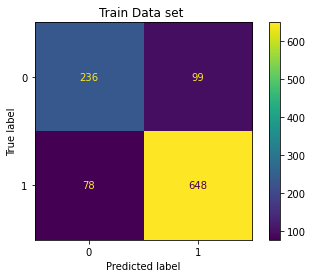

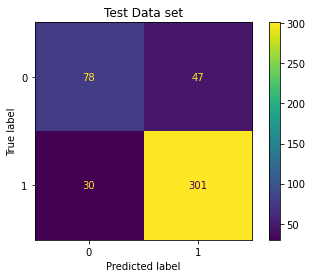

In [674]:
plot_confusion_matrix(lda_model,X_train,Y_train);
plt.title('Train Data set ');

plot_confusion_matrix(lda_model,X_test,Y_test);
plt.title('Test Data set');

### Classification report:

In [675]:
# For train data
print(classification_report(Y_train,predictlda_train_Y))

              precision    recall  f1-score   support

           0       0.75      0.70      0.73       335
           1       0.87      0.89      0.88       726

    accuracy                           0.83      1061
   macro avg       0.81      0.80      0.80      1061
weighted avg       0.83      0.83      0.83      1061



In [676]:
# For test data
print(classification_report(Y_test,predictlda_test_Y))

              precision    recall  f1-score   support

           0       0.72      0.62      0.67       125
           1       0.86      0.91      0.89       331

    accuracy                           0.83       456
   macro avg       0.79      0.77      0.78       456
weighted avg       0.83      0.83      0.83       456



### Plotting ROC curve and getting ROC_AUC score for LDA model:

AUC of linear Discriminant Analysis for train data: 0.887
AUC of linear Discriminant Analysis for test data: 0.890


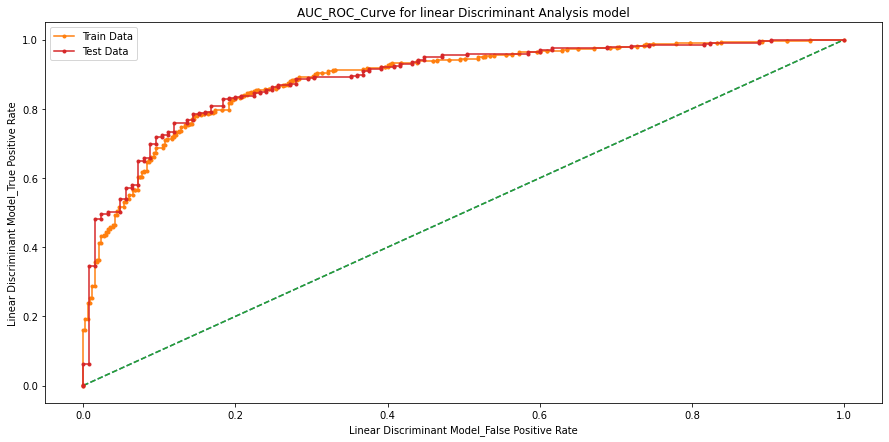

In [677]:
# For train data

# predict probabilities

probs_lda_train = lda_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_lda_train = probs_lda_train[:, 1]
# calculate AUC
lda_train_auc = roc_auc_score(Y_train,probs_lda_train)
print('AUC of linear Discriminant Analysis for train data: %.3f' % lda_train_auc)
# calculate roc curve
lda_train_fpr, lda_train_tpr, lda_train_thresholds = roc_curve(Y_train,probs_lda_train)
plt.figure(figsize=(15,7))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model

plt.plot(lda_train_fpr, lda_train_tpr, marker='.',label='Train Data')

# For test data

# predict probabilities
probs_lda_test = lda_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_lda_test = probs_lda_test[:, 1]
# calculate AUC
lda_test_auc = roc_auc_score(Y_test,probs_lda_test)
print('AUC of linear Discriminant Analysis for test data: %.3f' % lda_test_auc)
# calculate roc curve
lda_test_fpr, lda_test_tpr, lda_test_thresholds = roc_curve(Y_test,probs_lda_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr, marker='.',label='Test Data');

plt.xlabel('Linear Discriminant Model_False Positive Rate');
plt.ylabel('Linear Discriminant Model_True Positive Rate');
plt.title(('AUC_ROC_Curve for linear Discriminant Analysis model'))
plt.legend()
plt.show()

### Performence Summary for LDA  Model:

In [678]:
# for train data

LDA_metrics=classification_report(Y_train,predictlda_train_Y,output_dict=True)
df_dt=pd.DataFrame(LDA_metrics).transpose()
LDA_train_f1=round(df_dt.loc["1"][2],2)
LDA_train_recall=round(df_dt.loc["1"][1],2)
LDA_train_precision=round(df_dt.loc["1"][0],2)
print ('LDA_train_precision ',LDA_train_precision)
print ('LDA_train_recall ',LDA_train_recall)
print ('LDA_train_f1 ',LDA_train_f1)

LDA_train_precision  0.87
LDA_train_recall  0.89
LDA_train_f1  0.88


In [679]:
# for test data
LDA_metrics=classification_report(Y_test,predictlda_test_Y,output_dict=True)
df_dt=pd.DataFrame(LDA_metrics).transpose()
LDA_test_f1=round(df_dt.loc["1"][2],2)
LDA_test_recall=round(df_dt.loc["1"][1],2)
LDA_test_precision=round(df_dt.loc["1"][0],2)
print ('LDA_test_precision ',LDA_test_precision)
print ('LDA_test_recall ',LDA_test_recall)
print ('LDA_test_f1 ',LDA_test_f1)

LDA_test_precision  0.86
LDA_test_recall  0.91
LDA_test_f1  0.89


## Performance of KNN Model :

In [680]:
# predicting train and test labels 

predictknn_train_Y = knn_model.predict(X_train)
predictknn_test_Y = knn_model.predict(X_test)


# predicting train and test labels probabilities
probs_knn_train = knn_model.predict_proba(X_train)
probs_knn_test = knn_model.predict_proba(X_test)

### Performence : Accuracy

In [681]:
# KNN Model accuracy on train data

knn_train_acc = accuracy_score(Y_train,predictknn_train_Y).round(2)
print("KNN model accuracy on train data : ",accuracy_score(Y_train,predictknn_train_Y).round(4))

# KNN Model accuracy on test data

knn_test_acc = accuracy_score(Y_test,predictlda_test_Y).round(2) 
print("KNN model accuracy on test  data : ",accuracy_score(Y_test,predictknn_test_Y).round(4))

KNN model accuracy on train data :  0.852
KNN model accuracy on test  data :  0.8421


### Confusion Matrix:

In [682]:
# confusion matrix of KNN model for train data
pd.DataFrame(confusion_matrix(Y_train,predictknn_train_Y))

,0,1
0,247,88
1,69,657


In [683]:
# confusion matrix of KNN model for test data
pd.DataFrame(confusion_matrix(Y_test,predictknn_test_Y))

,0,1
0,84,41
1,31,300


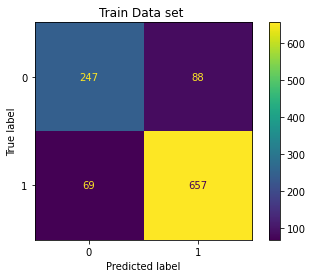

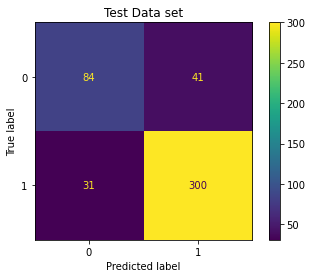

In [684]:
plot_confusion_matrix(knn_model,X_train,Y_train);
plt.title('Train Data set ');

plot_confusion_matrix(knn_model,X_test,Y_test);
plt.title('Test Data set');

### Classification report:

In [685]:
# classification report of KNN model for train data
print(classification_report(Y_train,predictknn_train_Y))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       335
           1       0.88      0.90      0.89       726

    accuracy                           0.85      1061
   macro avg       0.83      0.82      0.83      1061
weighted avg       0.85      0.85      0.85      1061



In [686]:
# classification report of KNN model for test data
print(classification_report(Y_test,predictknn_test_Y))

              precision    recall  f1-score   support

           0       0.73      0.67      0.70       125
           1       0.88      0.91      0.89       331

    accuracy                           0.84       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.84      0.84      0.84       456



### Plotting ROC curve and getting ROC_AUC score for KNN model:

AUC of KNN model for train data set : 0.916
AUC of KNN model for test data set : 0.864


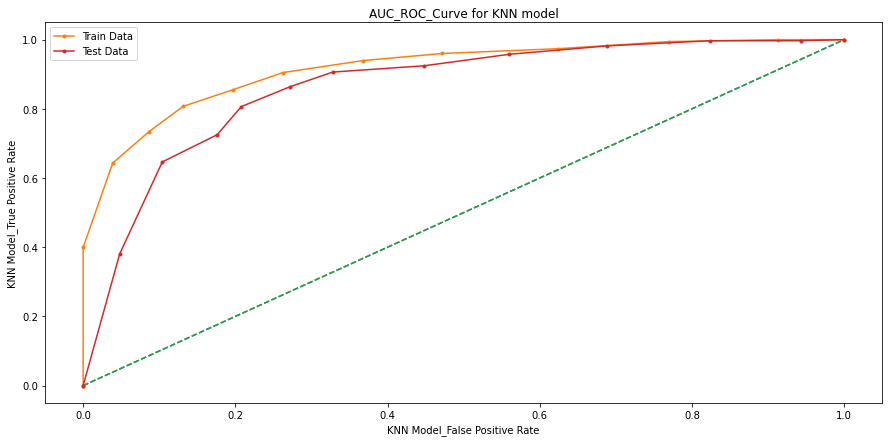

In [687]:
# For train data

# predict probabilities

probs_knn_train = knn_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_knn_train = probs_knn_train[:, 1]
# calculate AUC
knn_train_auc = roc_auc_score(Y_train,probs_knn_train)
print('AUC of KNN model for train data set : %.3f' % knn_train_auc)
# calculate roc curve
knn_train_fpr, knn_train_tpr, knn_train_thresholds = roc_curve(Y_train,probs_knn_train)
plt.figure(figsize=(15,7))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model

plt.plot(knn_train_fpr, knn_train_tpr, marker='.',label='Train Data')

# For test data

# predict probabilities
probs_knn_test = knn_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_knn_test = probs_knn_test[:, 1]
# calculate AUC
knn_test_auc = roc_auc_score(Y_test,probs_knn_test)
print('AUC of KNN model for test data set : %.3f' % knn_test_auc)
# calculate roc curve
knn_test_fpr, knn_test_tpr, knn_test_thresholds = roc_curve(Y_test,probs_knn_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_test_fpr, knn_test_tpr, marker='.',label='Test Data');

plt.xlabel('KNN Model_False Positive Rate');
plt.ylabel('KNN Model_True Positive Rate');
plt.title(('AUC_ROC_Curve for KNN model'))
plt.legend()
plt.show()

### Performence Summary for KNN Model:

In [688]:
# for train data

KNN_metrics=classification_report(Y_train,predictknn_train_Y,output_dict=True)
df_dt=pd.DataFrame(KNN_metrics).transpose()
KNN_train_f1=round(df_dt.loc["1"][2],2)
KNN_train_recall=round(df_dt.loc["1"][1],2)
KNN_train_precision=round(df_dt.loc["1"][0],2)
print ('KNN_train_precision ',KNN_train_precision)
print ('KNN_train_recall ',KNN_train_recall)
print ('KNN_train_f1 ',KNN_train_f1)

KNN_train_precision  0.88
KNN_train_recall  0.9
KNN_train_f1  0.89


In [689]:
# for test data
KNN_metrics=classification_report(Y_test,predictknn_test_Y,output_dict=True)
df_dt=pd.DataFrame(KNN_metrics).transpose()
KNN_test_f1=round(df_dt.loc["1"][2],2)
KNN_test_recall=round(df_dt.loc["1"][1],2)
KNN_test_precision=round(df_dt.loc["1"][0],2)
print ('KNN_test_precision ',KNN_test_precision)
print ('KNN_test_recall ',KNN_test_recall)
print ('KNN_test_f1 ',KNN_test_f1)

KNN_test_precision  0.88
KNN_test_recall  0.91
KNN_test_f1  0.89


### INFERENCE:

## Performance of Naïve Bayes Model :

In [690]:
# predicting train and test labels 

predictnbc_train_Y = nbc_model.predict(X_train)
predictnbc_test_Y = nbc_model.predict(X_test)


# predicting train and test labels probabilities
probs_nbc_train = nbc_model.predict_proba(X_train)
probs_nbc_test = nbc_model.predict_proba(X_test)

### Performence : Accuracy

In [691]:
# KNN Model accuracy on train data

nbc_train_acc = accuracy_score(Y_train,predictnbc_train_Y).round(2)
print("NBC model accuracy on train data : ",accuracy_score(Y_train,predictnbc_train_Y).round(2))
# NBC Model accuracy on test data

nbc_test_acc = accuracy_score(Y_test,predictnbc_test_Y).round(2) 
print("NBC model accuracy on  test data : ",accuracy_score(Y_test,predictnbc_test_Y).round(2))

NBC model accuracy on train data :  0.83
NBC model accuracy on  test data :  0.84


### Confusion matrix:

In [692]:
# confusion matrix of NBC model for train data
pd.DataFrame(confusion_matrix(Y_train, predictnbc_train_Y))

,0,1
0,234,101
1,80,646


In [693]:
# confusion matrix of NBC model for test data
pd.DataFrame(confusion_matrix(Y_test, predictnbc_test_Y))

,0,1
0,86,39
1,32,299


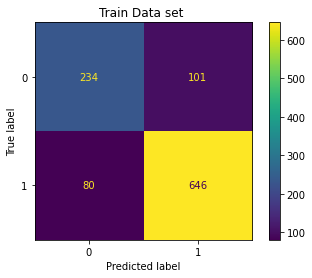

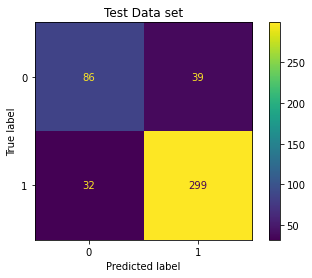

In [694]:
plot_confusion_matrix(nbc_model,X_train,Y_train);
plt.title('Train Data set ');

plot_confusion_matrix(nbc_model,X_test,Y_test);
plt.title('Test Data set');

### Classification report:

In [695]:
# classification report of NBC model for train data
print(classification_report(Y_train,predictnbc_train_Y))

              precision    recall  f1-score   support

           0       0.75      0.70      0.72       335
           1       0.86      0.89      0.88       726

    accuracy                           0.83      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



In [696]:
# classification report of NBC model for test data
print(classification_report(Y_test,predictnbc_test_Y))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       125
           1       0.88      0.90      0.89       331

    accuracy                           0.84       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.84      0.84      0.84       456



### Plotting ROC curve and getting ROC_AUC score for Naïve Bayes Model:

AUC of Naïve Bayes model for train data set : 0.883
AUC of Naïve Bayes model for test data set : 0.895


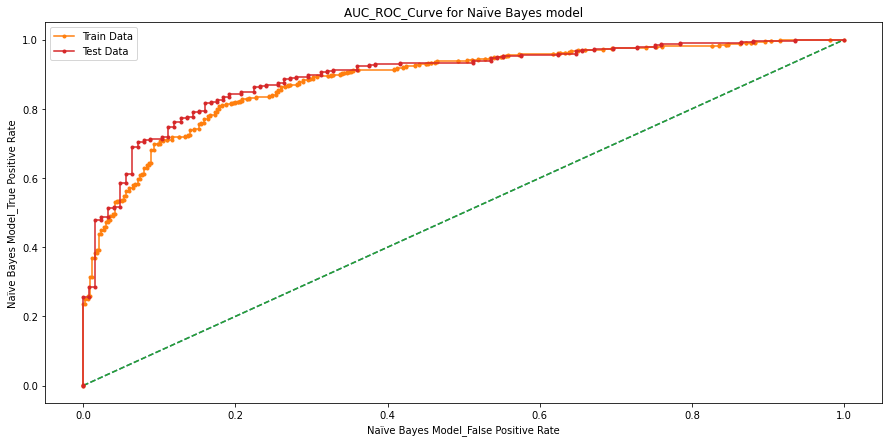

In [697]:
# For train data

# predict probabilities

probs_nbc_train = nbc_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_nbc_train = probs_nbc_train[:, 1]
# calculate AUC
nbc_train_auc = roc_auc_score(Y_train,probs_nbc_train)
print('AUC of Naïve Bayes model for train data set : %.3f' % nbc_train_auc)
# calculate roc curve
nbc_train_fpr, nbc_train_tpr, nbc_train_thresholds = roc_curve(Y_train,probs_nbc_train)
plt.figure(figsize=(15,7))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model

plt.plot(nbc_train_fpr, nbc_train_tpr, marker='.',label='Train Data')

# For test data

# predict probabilities
probs_nbc_test = nbc_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_nbc_test = probs_nbc_test[:, 1]
# calculate AUC
nbc_test_auc = roc_auc_score(Y_test,probs_nbc_test)
print('AUC of Naïve Bayes model for test data set : %.3f' % nbc_test_auc)
# calculate roc curve
nbc_test_fpr, nbc_test_tpr, nbc_test_thresholds = roc_curve(Y_test,probs_nbc_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nbc_test_fpr, nbc_test_tpr, marker='.',label='Test Data');

plt.xlabel('Naïve Bayes Model_False Positive Rate');
plt.ylabel('Naïve Bayes Model_True Positive Rate');
plt.title(('AUC_ROC_Curve for Naïve Bayes model'))
plt.legend()
plt.show()

### Performence Summary for Naïve Bayes Model:

In [698]:
# for train data

NBC_metrics=classification_report(Y_train,predictnbc_train_Y,output_dict=True)
df_dt=pd.DataFrame(NBC_metrics).transpose()
NBC_train_f1=round(df_dt.loc["1"][2],2)
NBC_train_recall=round(df_dt.loc["1"][1],2)
NBC_train_precision=round(df_dt.loc["1"][0],2)
print ('NBC_train_precision ',NBC_train_precision)
print ('NBC_train_recall ',NBC_train_recall)
print ('NBC_train_f1 ',NBC_train_f1)

NBC_train_precision  0.86
NBC_train_recall  0.89
NBC_train_f1  0.88


In [699]:
# for test data
NBC_metrics=classification_report(Y_test,predictnbc_test_Y,output_dict=True)
df_dt=pd.DataFrame(NBC_metrics).transpose()
NBC_test_f1=round(df_dt.loc["1"][2],2)
NBC_test_recall=round(df_dt.loc["1"][1],2)
NBC_test_precision=round(df_dt.loc["1"][0],2)
print ('NBC_test_precision ',NBC_test_precision)
print ('NBC_test_recall ',NBC_test_recall)
print ('NBC_test_f1 ',NBC_test_f1)

NBC_test_precision  0.88
NBC_test_recall  0.9
NBC_test_f1  0.89


### Inferences Naïve Bayes Model:

### Performance of Decision Tree Model : (Base estimator for Bagging and Boosting)

In [700]:
# predicting train and test labels 

predictdtc_train_Y = DT_model.predict(X_train)
predictdtc_test_Y = DT_model.predict(X_test)


# predicting train and test labels probabilities
probs_dtc_train = DT_model.predict_proba(X_train)
probs_dtc_test = DT_model.predict_proba(X_test)

### Performence : Accuracy

In [701]:
# Decision Tree Model accuracy on train data

dtc_train_acc = accuracy_score(Y_train,predictdtc_train_Y).round(2)
print("Decision Tree model accuracy on train data : ",accuracy_score(Y_train,predictdtc_train_Y).round(3))

# Decision Tree Model accuracy on test data

dtc_test_acc = accuracy_score(Y_test,predictdtc_test_Y).round(2) 
print("Decision Tree model accuracy on test data : ",accuracy_score(Y_test,predictdtc_test_Y).round(3))

Decision Tree model accuracy on train data :  0.902
Decision Tree model accuracy on test data :  0.796


### Confusion matrix:

In [702]:
# confusion matrix of DTC model for train data
pd.DataFrame(confusion_matrix(Y_train, predictdtc_train_Y))

,0,1
0,290,45
1,59,667


In [703]:
# confusion matrix of DTC model for test data
pd.DataFrame(confusion_matrix(Y_test, predictdtc_test_Y))

,0,1
0,84,41
1,52,279


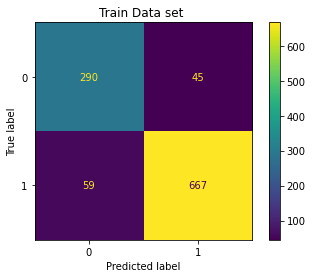

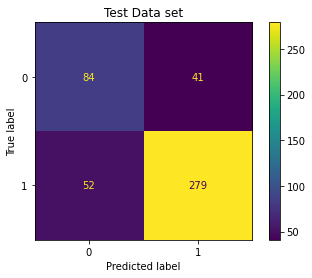

In [704]:
plot_confusion_matrix(DT_model,X_train,Y_train);
plt.title('Train Data set ');

plot_confusion_matrix(DT_model,X_test,Y_test);
plt.title('Test Data set');

### Classification report:

In [705]:
# classification report of DTC model for train data
print(classification_report(Y_train,predictdtc_train_Y))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       335
           1       0.94      0.92      0.93       726

    accuracy                           0.90      1061
   macro avg       0.88      0.89      0.89      1061
weighted avg       0.90      0.90      0.90      1061



In [706]:
# classification report of DTC model for test data
print(classification_report(Y_test,predictdtc_test_Y))

              precision    recall  f1-score   support

           0       0.62      0.67      0.64       125
           1       0.87      0.84      0.86       331

    accuracy                           0.80       456
   macro avg       0.74      0.76      0.75       456
weighted avg       0.80      0.80      0.80       456



### Plotting ROC curve and getting ROC_AUC score for Decision Tree  Model:

AUC of Decision Tree model for train data set : 0.963
AUC of Decision Tree model for test data set : 0.800


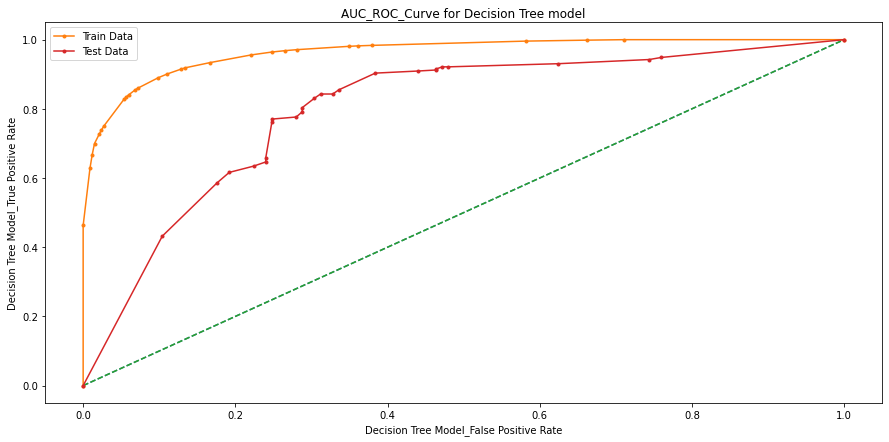

In [709]:
# For train data

# predict probabilities

probs_dtc_train = DT_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_dtc_train = probs_dtc_train[:, 1]
# calculate AUC
dtc_train_auc = roc_auc_score(Y_train,probs_dtc_train)
print('AUC of Decision Tree model for train data set : %.3f' % dtc_train_auc)
# calculate roc curve
dtc_train_fpr, dtc_train_tpr, dtc_train_thresholds = roc_curve(Y_train,probs_dtc_train)
plt.figure(figsize=(15,7))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model

plt.plot(dtc_train_fpr, dtc_train_tpr, marker='.',label='Train Data')

# For test data

# predict probabilities
probs_dtc_test = DT_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_dtc_test = probs_dtc_test[:, 1]
# calculate AUC
dtc_test_auc = roc_auc_score(Y_test,probs_dtc_test)
print('AUC of Decision Tree model for test data set : %.3f' % dtc_test_auc)
# calculate roc curve
dtc_test_fpr, dtc_test_tpr, dtc_test_thresholds = roc_curve(Y_test,probs_dtc_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(dtc_test_fpr, dtc_test_tpr, marker='.',label='Test Data');

plt.xlabel('Decision Tree Model_False Positive Rate');
plt.ylabel('Decision Tree Model_True Positive Rate');
plt.title(('AUC_ROC_Curve for Decision Tree model'))
plt.legend()
plt.show()

### Performence Summary for Decision Tree Model:

In [710]:
# for train data

DTC_metrics=classification_report(Y_train,predictdtc_train_Y,output_dict=True)
df_dt=pd.DataFrame(DTC_metrics).transpose()
DTC_train_f1=round(df_dt.loc["1"][2],2)
DTC_train_recall=round(df_dt.loc["1"][1],2)
DTC_train_precision=round(df_dt.loc["1"][0],2)
print ('DTC_train_precision ',DTC_train_precision)
print ('DTC_train_recall ',DTC_train_recall)
print ('DTC_train_f1 ',DTC_train_f1)

DTC_train_precision  0.94
DTC_train_recall  0.92
DTC_train_f1  0.93


In [711]:
# for test data
DTC_metrics=classification_report(Y_test,predictdtc_test_Y,output_dict=True)
df_dt=pd.DataFrame(DTC_metrics).transpose()
DTC_test_f1=round(df_dt.loc["1"][2],2)
DTC_test_recall=round(df_dt.loc["1"][1],2)
DTC_test_precision=round(df_dt.loc["1"][0],2)
print ('DTC_test_precision ',DTC_test_precision)
print ('DTC_test_recall ',DTC_test_recall)
print ('DTC_test_f1 ',DTC_test_f1)

DTC_test_precision  0.87
DTC_test_recall  0.84
DTC_test_f1  0.86


### Performance of Bagging Technique : (using Random Forest Bagging)

In [712]:
# predicting train and test labels 

predictrfc_train_Y = Bagging_RFCL.predict(X_train)
predictrfc_test_Y = Bagging_RFCL.predict(X_test)


# predicting train and test labels probabilities
probs_rfc_train = Bagging_RFCL.predict_proba(X_train)
probs_rfc_test = Bagging_RFCL.predict_proba(X_test)


### Performence : Accuracy

In [713]:
# Random Forest Model accuracy on train data

rfc_train_acc = accuracy_score(Y_train,predictrfc_train_Y).round(2)
print("Bagging model has accuracy on train data : ",accuracy_score(Y_train,predictrfc_train_Y).round(4))

# Random Forest Model accuracy on test data

rfc_test_acc = accuracy_score(Y_test,predictrfc_test_Y).round(2) 
print("Bagging model has accuracy on test  data : ",accuracy_score(Y_test,predictrfc_test_Y).round(4))

Bagging model has accuracy on train data :  0.9048
Bagging model has accuracy on test  data :  0.8333


### Confusion matrix:

In [714]:
# confusion matrix of Random Forest model for train data
pd.DataFrame(confusion_matrix(Y_train, predictrfc_train_Y))

,0,1
0,269,66
1,35,691


In [715]:
# confusion matrix of Random Forest model for test data
pd.DataFrame(confusion_matrix(Y_test, predictrfc_test_Y))


,0,1
0,75,50
1,26,305


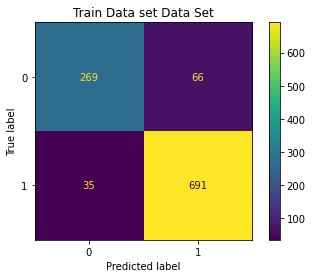

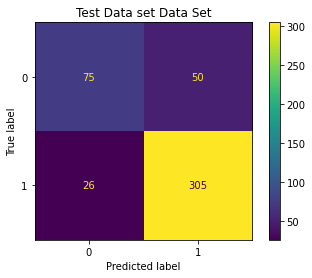

In [716]:
# pd.DataFrame(confusion_matrix(Y_train, predictrfc_train_Y))

plot_confusion_matrix(Bagging_RFCL,X_train,Y_train);
plt.title('Train Data set Data Set');

plot_confusion_matrix(Bagging_RFCL,X_test,Y_test);
plt.title('Test Data set Data Set');

### Classification report:

In [717]:
# classification report of Random Forest for train data
print(classification_report(Y_train,predictrfc_train_Y))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       335
           1       0.91      0.95      0.93       726

    accuracy                           0.90      1061
   macro avg       0.90      0.88      0.89      1061
weighted avg       0.90      0.90      0.90      1061



In [718]:
# classification report of Random Forest for test data
print(classification_report(Y_test,predictrfc_test_Y))

              precision    recall  f1-score   support

           0       0.74      0.60      0.66       125
           1       0.86      0.92      0.89       331

    accuracy                           0.83       456
   macro avg       0.80      0.76      0.78       456
weighted avg       0.83      0.83      0.83       456



### Plotting ROC curve and getting ROC_AUC score for Bagging/Random Forest  Model:

AUC of Bagging (Random Forest) model for train data set : 0.966
AUC of Bagging (Random Forest) model for test data set : 0.893


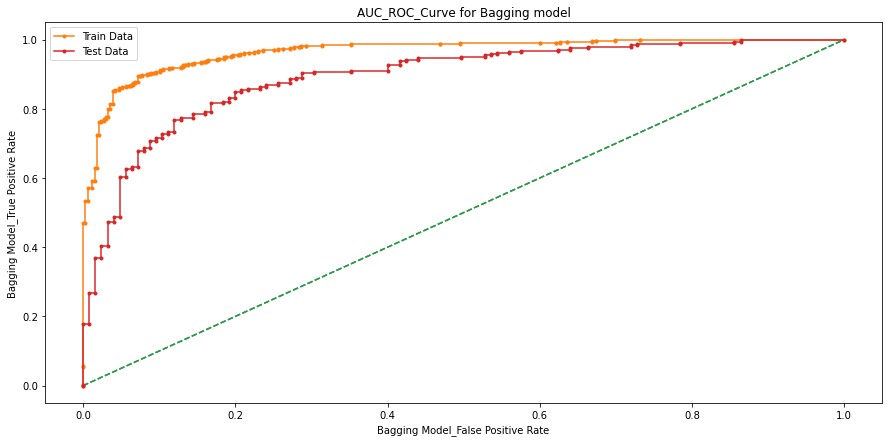

In [719]:
# For train data

# predict probabilities

probs_rfc_train = Bagging_RFCL.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_rfc_train = probs_rfc_train[:, 1]
# calculate AUC
rfc_train_auc = roc_auc_score(Y_train,probs_rfc_train)
print('AUC of Bagging (Random Forest) model for train data set : %.3f' % rfc_train_auc)
# calculate roc curve
rfc_train_fpr, rfc_train_tpr, rfc_train_thresholds = roc_curve(Y_train,probs_rfc_train)
plt.figure(figsize=(15,7))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model

plt.plot(rfc_train_fpr, rfc_train_tpr, marker='.',label='Train Data')

# For test data

# predict probabilities
probs_rfc_test = Bagging_RFCL.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_rfc_test = probs_rfc_test[:, 1]
# calculate AUC
rfc_test_auc = roc_auc_score(Y_test,probs_rfc_test)
print('AUC of Bagging (Random Forest) model for test data set : %.3f' % rfc_test_auc)
# calculate roc curve
rfc_test_fpr, rfc_test_tpr, rfc_test_thresholds = roc_curve(Y_test,probs_rfc_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rfc_test_fpr, rfc_test_tpr, marker='.',label='Test Data');

plt.xlabel('Bagging Model_False Positive Rate');
plt.ylabel('Bagging Model_True Positive Rate');
plt.title(('AUC_ROC_Curve for Bagging model'))
plt.legend()
plt.show()


### Performence Summary for Bagging (Random Forest) Model :

In [720]:


# for train data
RFC_metrics=classification_report(Y_train,predictrfc_train_Y,output_dict=True)
df_dt=pd.DataFrame(RFC_metrics).transpose()
RFC_train_f1=round(df_dt.loc["1"][2],2)
RFC_train_recall=round(df_dt.loc["1"][1],2)
RFC_train_precision=round(df_dt.loc["1"][0],2)
print ('Bagging_train_precision ',RFC_train_precision)
print ('Bagging_train_recall ',RFC_train_recall)
print ('Bagging_train_f1 ',RFC_train_f1)


Bagging_train_precision  0.91
Bagging_train_recall  0.95
Bagging_train_f1  0.93


In [721]:
# for test data
RFC_metrics=classification_report(Y_test,predictrfc_test_Y,output_dict=True)
df_dt=pd.DataFrame(RFC_metrics).transpose()
RFC_test_f1=round(df_dt.loc["1"][2],2)
RFC_test_recall=round(df_dt.loc["1"][1],2)
RFC_test_precision=round(df_dt.loc["1"][0],2)
print ('Bagging_test_precision ',RFC_test_precision)
print ('Bagging_test_recall ',RFC_test_recall)
print ('Bagging_test_f1 ',RFC_test_f1)

Bagging_test_precision  0.86
Bagging_test_recall  0.92
Bagging_test_f1  0.89


### Performance of Boosting Technique : (AdaBoost)


In [722]:
# predicting train and test labels 

predictadc_train_Y = Boosting_adb.predict(X_train)
predictadc_test_Y = Boosting_adb.predict(X_test)

# predicting train and test labels probabilities
probs_adc_train = Boosting_adb.predict_proba(X_train)
probs_adc_test = Boosting_adb.predict_proba(X_test)


### Performence : Accuracy

In [723]:
# Boosting Model /adaboost accuracy on train data

adc_train_acc = accuracy_score(Y_train,predictadc_train_Y).round(2)
print("Boosting (AdaBoost) model accuracy on train data : ",accuracy_score(Y_train,predictadc_train_Y).round(4))

# Boosting (adaboost) Model accuracy on test data

adc_test_acc = accuracy_score(Y_test,predictadc_test_Y).round(2) 
print("Boosting (AdaBoost) model accuracy on test  data : ",accuracy_score(Y_test,predictadc_test_Y).round(4))


Boosting (AdaBoost) model accuracy on train data :  0.8643
Boosting (AdaBoost) model accuracy on test  data :  0.8509


### Confusion matrix:

In [724]:
# confusion matrix of Boosting (AdaBoost) model for train data
pd.DataFrame(confusion_matrix(Y_train, predictadc_train_Y))

,0,1
0,254,81
1,63,663


In [725]:
# confusion matrix of Boosting (AdaBoost) model for test data
pd.DataFrame(confusion_matrix(Y_test, predictadc_test_Y))


,0,1
0,89,36
1,32,299


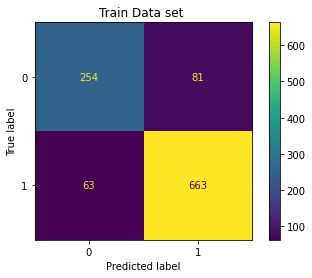

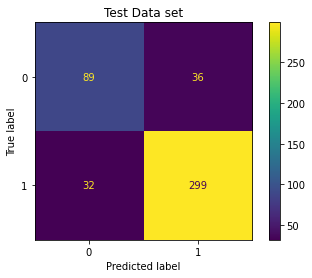

In [726]:
plot_confusion_matrix(Boosting_adb,X_train,Y_train);
plt.title('Train Data set ');

plot_confusion_matrix(Boosting_adb,X_test,Y_test);
plt.title('Test Data set');

### Classification report:

In [727]:
# classification report of Boosting (AdaBoost) Model for train data
print(classification_report(Y_train, predictadc_train_Y))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       335
           1       0.89      0.91      0.90       726

    accuracy                           0.86      1061
   macro avg       0.85      0.84      0.84      1061
weighted avg       0.86      0.86      0.86      1061



In [728]:
# classification report of Boosting (AdaBoost) model for test data
print(classification_report(Y_test, predictadc_test_Y))


              precision    recall  f1-score   support

           0       0.74      0.71      0.72       125
           1       0.89      0.90      0.90       331

    accuracy                           0.85       456
   macro avg       0.81      0.81      0.81       456
weighted avg       0.85      0.85      0.85       456



### Plotting ROC curve and getting ROC_AUC score for Boosting (AdaBoost)  Model:

AUC of Boosting (AdaBoost) model for train data set : 0.937
AUC of Boosting (AdaBoost) model for test data set : 0.897


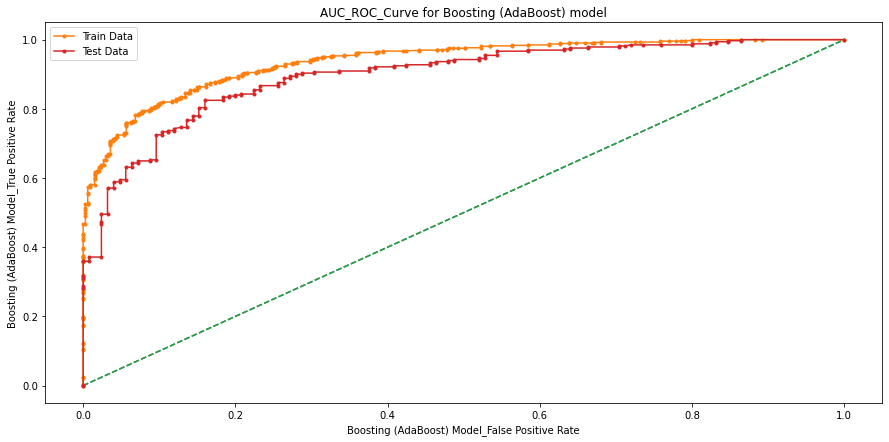

In [729]:
# For train data

# predict probabilities

probs_adc_train = Boosting_adb.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_adc_train = probs_adc_train[:, 1]
# calculate AUC
adc_train_auc = roc_auc_score(Y_train,probs_adc_train)
print('AUC of Boosting (AdaBoost) model for train data set : %.3f' % adc_train_auc)
# calculate roc curve
adc_train_fpr, adc_train_tpr, adc_train_thresholds = roc_curve(Y_train,probs_adc_train)
plt.figure(figsize=(15,7))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model

plt.plot(adc_train_fpr, adc_train_tpr, marker='.',label='Train Data')

# For test data

# predict probabilities
probs_adc_test = Boosting_adb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_adc_test = probs_adc_test[:, 1]
# calculate AUC
adc_test_auc = roc_auc_score(Y_test,probs_adc_test)
print('AUC of Boosting (AdaBoost) model for test data set : %.3f' % adc_test_auc)
# calculate roc curve
adc_test_fpr, adc_test_tpr, adc_test_thresholds = roc_curve(Y_test,probs_adc_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(adc_test_fpr, adc_test_tpr, marker='.',label='Test Data');

plt.xlabel('Boosting (AdaBoost) Model_False Positive Rate');
plt.ylabel('Boosting (AdaBoost) Model_True Positive Rate');
plt.title(('AUC_ROC_Curve for Boosting (AdaBoost) model'))
plt.legend()
plt.show()


### Performence Summary for Boosting (AdaBoost) Model:

In [730]:
# for train data
ADC_metrics=classification_report(Y_train,predictadc_train_Y,output_dict=True)
df_dt=pd.DataFrame(ADC_metrics).transpose()
ADC_train_f1=round(df_dt.loc["1"][2],2)
ADC_train_recall=round(df_dt.loc["1"][1],2)
ADC_train_precision=round(df_dt.loc["1"][0],2)
print ('Boosting_train_precision ',ADC_train_precision)
print ('Boosting_train_recall ',ADC_train_recall)
print ('Boosting_train_f1 ',ADC_train_f1)



Boosting_train_precision  0.89
Boosting_train_recall  0.91
Boosting_train_f1  0.9


In [731]:
# for test data
ADC_metrics=classification_report(Y_test,predictadc_test_Y,output_dict=True)
df_dt=pd.DataFrame(ADC_metrics).transpose()
ADC_test_f1=round(df_dt.loc["1"][2],2)
ADC_test_recall=round(df_dt.loc["1"][1],2)
ADC_test_precision=round(df_dt.loc["1"][0],2)
print ('Boosting_test_precision ',ADC_test_precision)
print ('Boosting_test_recall ',ADC_test_recall)
print ('Boosting_test_f1 ',ADC_test_f1)

Boosting_test_precision  0.89
Boosting_test_recall  0.9
Boosting_test_f1  0.9


#### We can also check the number of incorrect predictions made by different models on test data 

In [732]:
models= [lgr_model,lda_model,knn_model,nbc_model,DT_model,Bagging_RFCL,Boosting_adb]
for model in models:
    Y_pred= model.predict(X_test)
    print("incorrect predictions"  , (Y_test != Y_pred).sum(),model )


incorrect predictions 76 LogisticRegression(random_state=1, verbose=1)
incorrect predictions 77 LinearDiscriminantAnalysis()
incorrect predictions 72 KNeighborsClassifier(n_neighbors=11)
incorrect predictions 71 GaussianNB()
incorrect predictions 93 DecisionTreeClassifier(max_depth=7, random_state=0)
incorrect predictions 76 RandomForestClassifier(max_depth=7, n_estimators=700, random_state=42)
incorrect predictions 68 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.001, n_estimators=10000, random_state=42)


### Final Model: Compare the models and write inference which model is best/optimized :

In [733]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
result = pd.DataFrame({'Logistic Train':[lgr_train_acc,lgr_train_auc,Logistic_train_recall,Logistic_train_precision,Logistic_train_f1],
        'Logistic Test':[lgr_test_acc,lgr_test_auc,Logistic_test_recall,Logistic_test_precision,Logistic_test_f1],
       'LDA Train':[LDA_train_acc,lda_train_auc,LDA_train_recall,LDA_train_precision,LDA_train_f1],
        'LDA Test':[LDA_test_acc,lda_test_auc,LDA_test_recall,LDA_test_precision,LDA_test_f1],
        'KNN Train':[knn_train_acc,knn_train_auc,KNN_train_recall,KNN_train_precision,KNN_train_f1],
        'KNN Test':[knn_test_acc,knn_test_auc,KNN_test_recall,KNN_test_precision,KNN_test_f1],
        'Naïve Bayes Train':[nbc_train_acc,nbc_train_auc,NBC_train_recall,NBC_train_precision,NBC_train_f1],
        'Naïve Bayes Test':[nbc_test_acc,nbc_test_auc,NBC_test_recall,NBC_test_precision,NBC_test_f1],
        'D.Tree Train':[dtc_train_acc,dtc_train_auc,DTC_train_recall,DTC_train_precision,DTC_train_f1],
        'D.Tree Test':[dtc_test_acc,dtc_test_auc,DTC_test_recall,DTC_test_precision,DTC_test_f1],
        'Bagging Train':[rfc_train_acc,rfc_train_auc,RFC_train_recall,RFC_train_precision,RFC_train_f1],
        'Bagging Test':[rfc_test_acc,rfc_test_auc,RFC_test_recall,RFC_test_precision,RFC_test_f1],
        'Boosting Train':[adc_train_acc,adc_train_auc,ADC_train_recall,ADC_train_precision,ADC_train_f1],
        'Boosting Test':[adc_test_acc,adc_test_auc,ADC_test_recall,ADC_test_precision,ADC_test_f1]},index=index)
        
result.round(2)

,Logistic Train,Logistic Test,LDA Train,LDA Test,KNN Train,KNN Test,Naïve Bayes Train,Naïve Bayes Test,D.Tree Train,D.Tree Test,Bagging Train,Bagging Test,Boosting Train,Boosting Test
Accuracy,0.84,0.83,0.83,0.83,0.85,0.83,0.83,0.84,0.90,0.80,0.90,0.83,0.86,0.85
AUC,0.89,0.89,0.89,0.89,0.92,0.86,0.88,0.89,0.96,0.80,0.97,0.89,0.94,0.90
Recall,0.90,0.92,0.89,0.91,0.90,0.91,0.89,0.90,0.92,0.84,0.95,0.92,0.91,0.90
Precision,0.86,0.86,0.87,0.86,0.88,0.88,0.86,0.88,0.94,0.87,0.91,0.86,0.89,0.89
F1 Score,0.88,0.89,0.88,0.89,0.89,0.89,0.88,0.89,0.93,0.86,0.93,0.89,0.90,0.90


Our purpose of making this  model is to predict the voter's  choice of Party in the survey with high accuracy.

* Therefore 
1(a). Model must be able to predict both 0s as well as 1s with high accuracy.

1(b) Important point to note here that if we are considering Accuracy as performence measurement of model  it can be psuedo because 0s (here Conservative Party) are only 30% out of the total target class and therefore Accuracy may    be high inspite of very low value of TNs.    
1(c)  Therefore we need to consider a performence matrix which can have capability to separate the TNs and TPs accurately and ROC-AUC does this job perfectly. So we will consider AUC as our performence measure tool before accuracy. 

2(a) Model Must have minimum number of FP+FN while prediction and F1_score takes care of both parallely.
2(b) Therefore we can consider F1_Score as our next performence requirement of model.

3(a) As 0s (Negative class) in target class of the data set is in less in numbers (imbalance class) therefore model also should not start predicting every thing as positive i.e. model should have mimimun of FPs.
3(b) Therefore model must have high value of Precision.

Therefore finally in terms of performence metrics our priority order should be-

AUC - Ability of the model to separate/differentiate between 0s(Negatives) and 1s(Positives) in target class.
Accuracy - Ability of the model to detect maximum of Positives & Negatives as TP and TN respectevely out of the target class.
F1_Score - Ability of the model to minimize the number of FP anf FN while predicting for target class. 
Precision - Ability of model to minimize FPs . ( Here in case of imbalance data)




 AUC > Accuracy > F1_Score > Precision > Recall 

From Above tabular form of performences of different models let us see which performence is winner (Low variance in model) in which model:

AUC -         Boosting(AdaBoost),Logistic Rgression and  LDA are showing better AUC performence compared to rest of all models.
Accuracy -    Boosting(AdaBoost) showing best accuracy performence followed by Naïve Bayes ,compared to rest of all models .
F1_Score -    Boosting(AdaBoost) model showing higher F1_score compared to rest of all models.
Precision -   Boosting(AdaBoost) model showing higher Precision compared to rest of all models.

Therefore we can say that Boosting(AdaBoost) model is clearly better performing compared to rest of all models at required performence matices.




# Inference: 5 marks

## Prob 1.8. Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective. (5 marks)


### Business objective of the survey: Prediction of exit polls with high accuracy.
### Important point to note that exit poll questionnaire has basically three types of data/information.
1.	A variety of attitudes held by the voters towards issues such as the issues that were important in determining their vote and their party affiliation.
2.	Level of impact of the issue on voting decision by each demo graphic factor. 
3.	 The demographic characteristics of the voter such as their age and gender.

Note:  The first two sets of information can be used to explain why respondents voted as they did and what kinds of people voted for each candidate. 
 	Use additional data beyond that gathered in the exit polls, including historical voting data such as past turnout.
The data information which is the issue for which variety of attitudes is held by the voters is very much important to understand from three different angles-
	 Issues/factors Point of view:
•	It is important to note the issue which is influencing the voting decision of voter and up to what level. This we can get from correlation matrix for each feature with target feature.
•	It might be that some specific issue has larger impact compared to other issues in decision making by voters.
•	Here in case we can see that economical conations of households and nation are two important issues and are influencing the voting decisions.
•	We need to correlate it with demography for better picture of voting decisions.


	Demographic point of view: 

•	It’s important to understand that the issue which is important in the voting decision factor is impacting which type of demography and up to what level.
•	Such as here the factor ‘Eurosceptic’ sentiment has different influence on different range of ages. We can find following useful demographic impacts on voting patterns of voters.
•	From EDA portion we can see that 90s age voters are inclined towards the Conservative party.
•	From EDA portion we can see that voters specially aged between 25 to 45 are inclined towards the Labour party. 
•	 From EDA portion we can also see that voters specially aged between 65 and 80 are inclined towards the Conservative party. 

•	It is important to note that which issues are influencing for deciding the voting decision of voters in different areas.
•	It might be that some specific area has high influence of specific issue compared to other area in deciding their vote.

	Historical voting data such as past turnout :
•	It most important to know the voting turnout for each type of demography with help of previous turnouts and their demographic bifurcations. 
•	It will not only help in providing the impact of each demography and issues but also the accuracy of prediction.

It means we have three points for getting the voting decision:

•	Issues and its impact on different demography (issue impact on which age range at what level.)
•	Demography of different areas. (voters number as per  age range in each area)
•	Turnout of each demography (as per age range) in each area. 
(High turnout of a particular demography having high number of that demography in that area will have higher impact)  
  Finally we can use combination of all the above three points to get exit poll with accuracy.


# Problem 2:

Problem 2:
In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:
1.	President Franklin D. Roosevelt in 1941
2.	President John F. Kennedy in 1961
3.	President Richard Nixon in 1973
•	Find the number of characters, words and sentences for the mentioned documents. – 3 Marks
(Hint: use .words(), .raw(), .sent() for extracting counts)
•	Remove all the stopwords from all the three speeches. – 3 Marks
•	Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords) – 3 Marks
•	Plot the word cloud of each of the speeches of the variable. (after removing the stopwords) – 3 Marks [ refer to the End-to-End Case Study done in the Mentored Learning Session ]
Code Snippet to extract the three speeches:
"
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')
"
Important Note: Please reflect on all that you have learned while working on this project. This step is critical in cementing all your concepts and closing the loop. Please write down your thoughts here.



In [121]:


import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()

speech_Roosevelt = inaugural.raw('1941-Roosevelt.txt')
speech_Kennedy=inaugural.raw('1961-Kennedy.txt')
speech_Nixon=inaugural.raw('1973-Nixon.txt')

[nltk_data] Error loading inaugural: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [207]:
df = pd.DataFrame({'president_name': ['Roosevelt', 'Kennedy', 'Nixon'],            
               'speeches':[speech_Roosevelt,speech_Kennedy,speech_Nixon,]})

In [208]:
df.head()

,president_name,speeches
0,Roosevelt,On each national day of inauguration since 178...
1,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
2,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


In [209]:
df.shape

(3, 2)

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   president_name  3 non-null      object
 1   speeches        3 non-null      object
dtypes: object(2)
memory usage: 176.0+ bytes


In [211]:
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

president_name    0.0
speeches          0.0
dtype: float64

##  2.1) Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts.  3

## Characters count:

#### Number of characters- including spaces:

In [213]:
# used lambda function to count length of doc and applied to an iterative list
df['count_characters_includespaces']= df['speeches'].apply(lambda doc:len(str(doc)))
df[['president_name','count_characters_includespaces']].head()

,president_name,count_characters_includespaces
0,Roosevelt,7571
1,Kennedy,7618
2,Nixon,9991


#### Number of characters- excluding spaces:

In [214]:
# used lambda function to count length of the doc whose white spaces are replaced by no space first and then applied to an iterative list
df['char_count_excludespaces']=df['speeches'].apply(lambda doc: len(str(doc.replace(" ",""))))
df[['president_name','char_count_excludespaces']]

,president_name,char_count_excludespaces
0,Roosevelt,6249
1,Kennedy,6255
2,Nixon,8223


### Word count:

####  As punchuatations will be counted as word therefore we will remove them prior finding total count of  words used in different speeches 

In [215]:
# removing punchuatations
# replacing all charcters but not alphabets or numerics by no space means deleting.
df['speeches_cleaned'] =df['speeches'].str.replace('[^\w\s]','')


# using a lambda function :
#( splitting the doc on bass of space using split function  and counting total numbers and then applying it to iterartive list) 

df['count_word'] = df['speeches_cleaned'].apply(lambda doc: len(str(doc).split()))

# using list comprehension / without using a lambda function 
# df['count_word'] = [len(x.split(" ")) for x in df['speeches'].tolist()]
df[['president_name','count_word']].head()

,president_name,count_word
0,Roosevelt,1338
1,Kennedy,1365
2,Nixon,1802


### Sentence count:

### Note:
#### 1. We can see from the texts that every new line  starts with "\n\n" .
#### 2. Therefore we will use it ("\n\n") to split the sentences using split function and then will count them using len function.

In [216]:
df['count_sent'] = df['speeches'].apply(lambda doc: len(str(doc).split("\n\n")))
df[['president_name','speeches','count_sent']].head()

,president_name,speeches,count_sent
0,Roosevelt,On each national day of inauguration since 178...,38
1,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",27
2,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",51


##  2.2) Remove all the stopwords from the three speeches. 

#### As any word can be in lowercase as well as in uppercase and would be counted separetlty asuppercases well as will not be captured in standard stopword list , therefore converting all words to lower case first.
#### Also punchuatations will be counted as word therefore we will remove them prior  finding frequent words used in different speeches. 

In [217]:
# removing punchuatations
df['speeches'] =df['speeches'].str.replace('[^\w\s]','')

## Converting all the words to lower case
df['speeches'] = df['speeches'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [218]:
# downloading list of defined stopwords for english and saving it as stops
import nltk
from nltk.corpus import stopwords
stops = stopwords.words('english')

In [219]:
# Lets first check the count of stopwords

df['Count_stopwords'] = df['speeches'].apply(lambda x: len([x for x in x.split() if x in stops]))
df[['president_name','Count_stopwords']].head()

,president_name,Count_stopwords
0,Roosevelt,711
1,Kennedy,672
2,Nixon,969


### Removing stopwords:

In [221]:
# we want to filter the words which are not stopwords
# therefore first we should make a list of all words with help of splitting the complete speech 
# then we should filter the words using a condition

df['speeches']=df['speeches'].apply(lambda doc:" ".join(doc for doc in doc.split() if doc  not  in stops))
df[['president_name','speeches']].head()

,president_name,speeches
0,Roosevelt,national day inauguration since 1789 people re...
1,Kennedy,vice president johnson mr speaker mr chief jus...
2,Nixon,mr vice president mr speaker mr chief justice ...


###  We have removed the standard defined stopwords for English but let us check for this case if any word can be added in stopword list. 

In [222]:
freq_all = pd.Series(' '.join(df['speeches']).split()).value_counts()[:10]
freq_all

us            46
let           39
world         27
new           26
peace         23
america       22
nation        21
nations       15
people        14
government    14
dtype: int64

### Note: We are not removing words like "us" because it might for USA and will move forward as such on basis of standard defined stopwords for English.

### Lets recheck the count of stopwords

In [223]:

df['Count_stopwords'] = df['speeches'].apply(lambda x: len([x for x in x.split() if x in stops]))
df[['president_name','Count_stopwords']].head()

,president_name,Count_stopwords
0,Roosevelt,0
1,Kennedy,0
2,Nixon,0


#### We can see that now there is no stopword in any of speeches.

##  2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)  3

### Top three words in inaugural address of each president:

In [224]:
freq = pd.Series(df['speeches'][0].split(" ")).value_counts()[:3]
print ("Top three words in inaugural address of President Roosevelt : \n\n ", freq)

Top three words in inaugural address of President Roosevelt : 

  nation       11
know         10
democracy     9
dtype: int64


In [225]:
freq = pd.Series(df['speeches'][1].split(" ")).value_counts()[:3]
print ("Top three words in inaugural address of President Kennedy : \n\n" ,freq)

Top three words in inaugural address of President Kennedy : 

 let      16
us       12
sides     8
dtype: int64


In [226]:
freq = pd.Series(df['speeches'][2].split(" ")).value_counts()[:3]
print ("Top three words in inaugural address of President Nixon:\n\n " , freq)

Top three words in inaugural address of President Nixon:

  us       26
let      22
peace    19
dtype: int64


## 2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords) 3

### wordcloud_Roosevelt:

Word Cloud for Roosevelt_speech (after removing the stopwords)!!


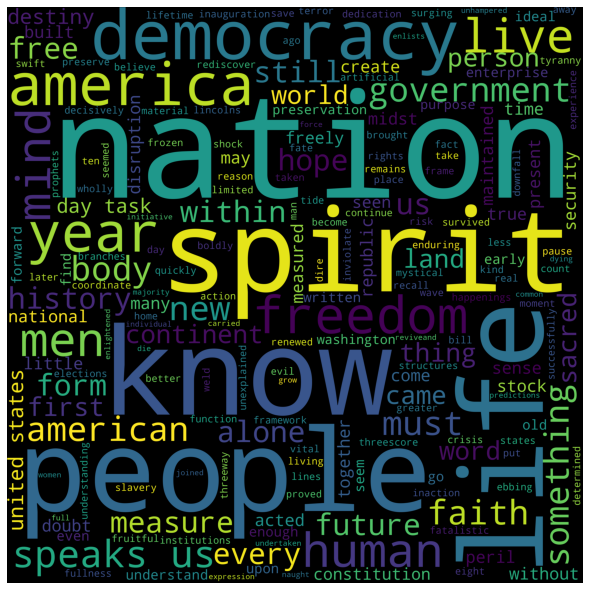

In [227]:
word_Roosevelt=df['speeches'][0]
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(word_Roosevelt) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Roosevelt_speech (after removing the stopwords)!!")
plt.show()


### wordcloud_Kennedy:

Word Cloud for Kennedy_speech (after removing the stopwords)!!


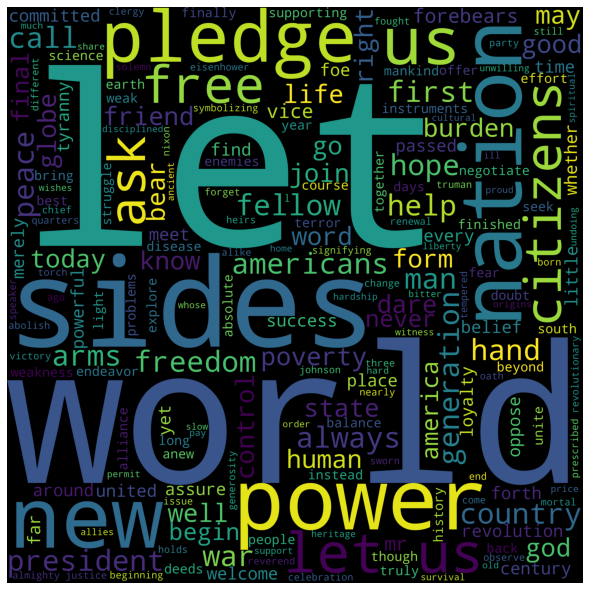

In [228]:
word_Kennedy=df['speeches'][1]
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(word_Kennedy) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Kennedy_speech (after removing the stopwords)!!")
plt.show()


## wordcloud_Nixon:

Word Cloud for Nixon_speech (after removing the stopwords)!!


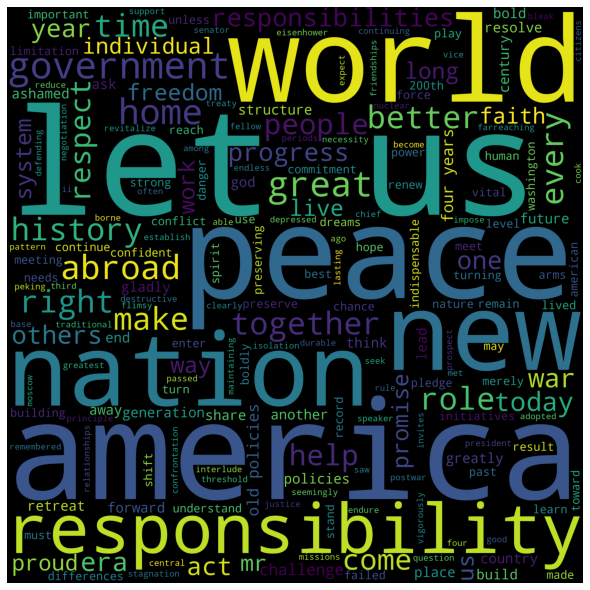

In [229]:
word_Nixon=df['speeches'][2]
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(word_Nixon) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Nixon_speech (after removing the stopwords)!!")
plt.show()

 ### We can confirm the most occuring words found in previous question in respective wordclouds. 

* Starting of Learning.....